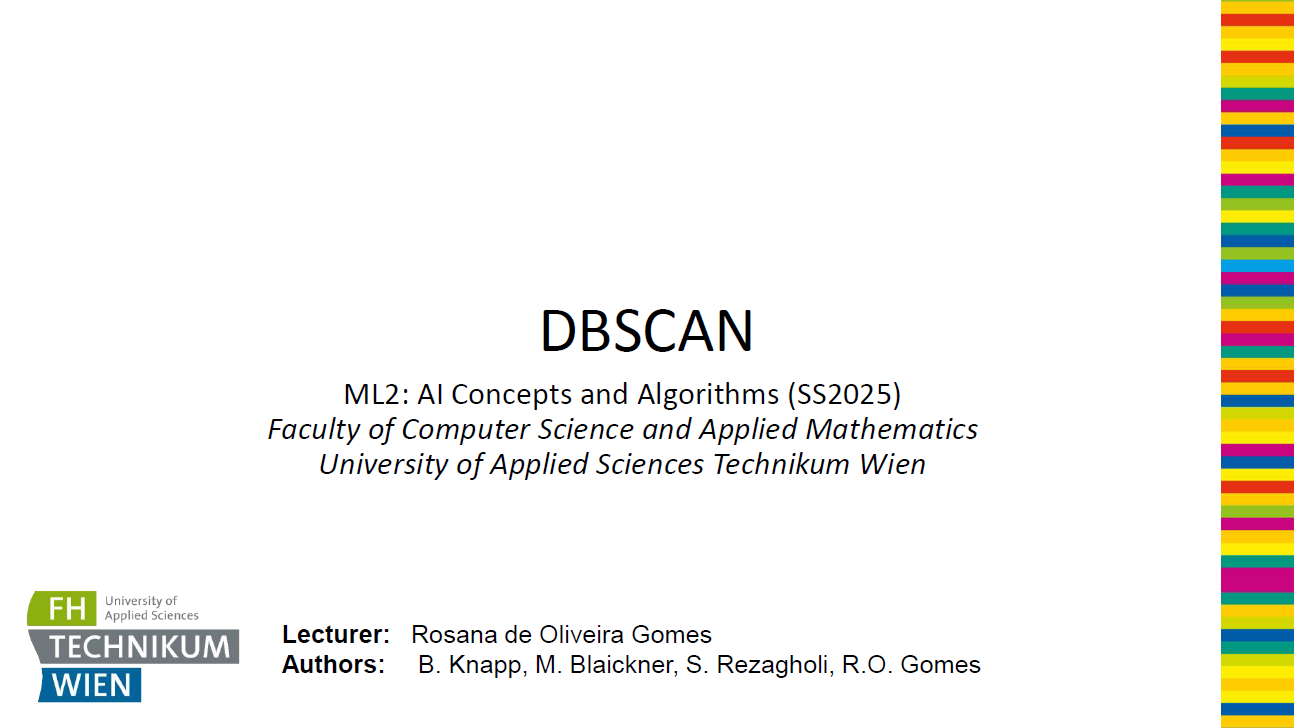

Thank you. Here's the opening for your presentation:

---

**Good \[morning/afternoon], everyone.**

Today, I will be presenting **DBSCAN**, which stands for *Density-Based Spatial Clustering of Applications with Noise*. This presentation is part of the **ML2: AI Concepts and Algorithms** course for the Summer Semester 2025, offered by the **Faculty of Computer Science and Applied Mathematics** at the **University of Applied Sciences Technikum Wien**.

This lecture was prepared by **Rosana de Oliveira Gomes**, and the slide content is based on the work of **B. Knapp, M. Blaickner, S. Rezagholi, and R.O. Gomes**.

Let’s now begin exploring the concept of DBSCAN and understand how it performs clustering based on density rather than distance or predefined numbers of clusters.

Please go ahead and show the next slide.


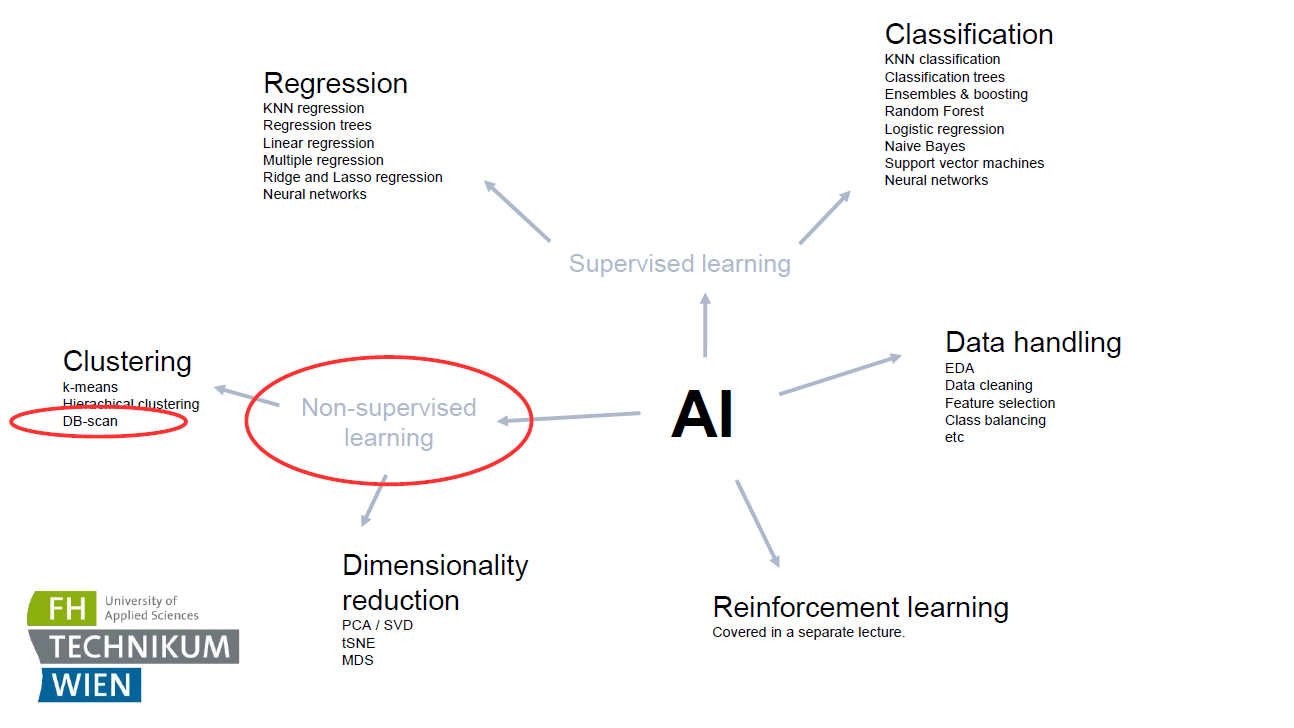

Thank you.

---

**Let’s now position DBSCAN within the broader AI landscape.**

This diagram offers a high-level overview of key areas within **Artificial Intelligence**. We see two main branches: **Supervised Learning** and **Non-Supervised Learning**—also referred to as **Unsupervised Learning**.

DBSCAN belongs to the **Non-Supervised Learning** branch, specifically under **Clustering**. Unlike supervised methods where we work with labeled data to perform classification or regression, clustering techniques aim to find inherent groupings within data that has **no predefined labels**.

Other clustering methods like **k-means** and **hierarchical clustering** are also listed, but DBSCAN distinguishes itself by being **density-based**, capable of finding clusters of **arbitrary shapes** and handling **noise**—something that k-means and hierarchical methods often struggle with.

In this session, we’ll focus on understanding how DBSCAN identifies clusters based on density, how it classifies points as core, border, or noise, and how it compares to traditional clustering methods.

Let’s move to the next slide.


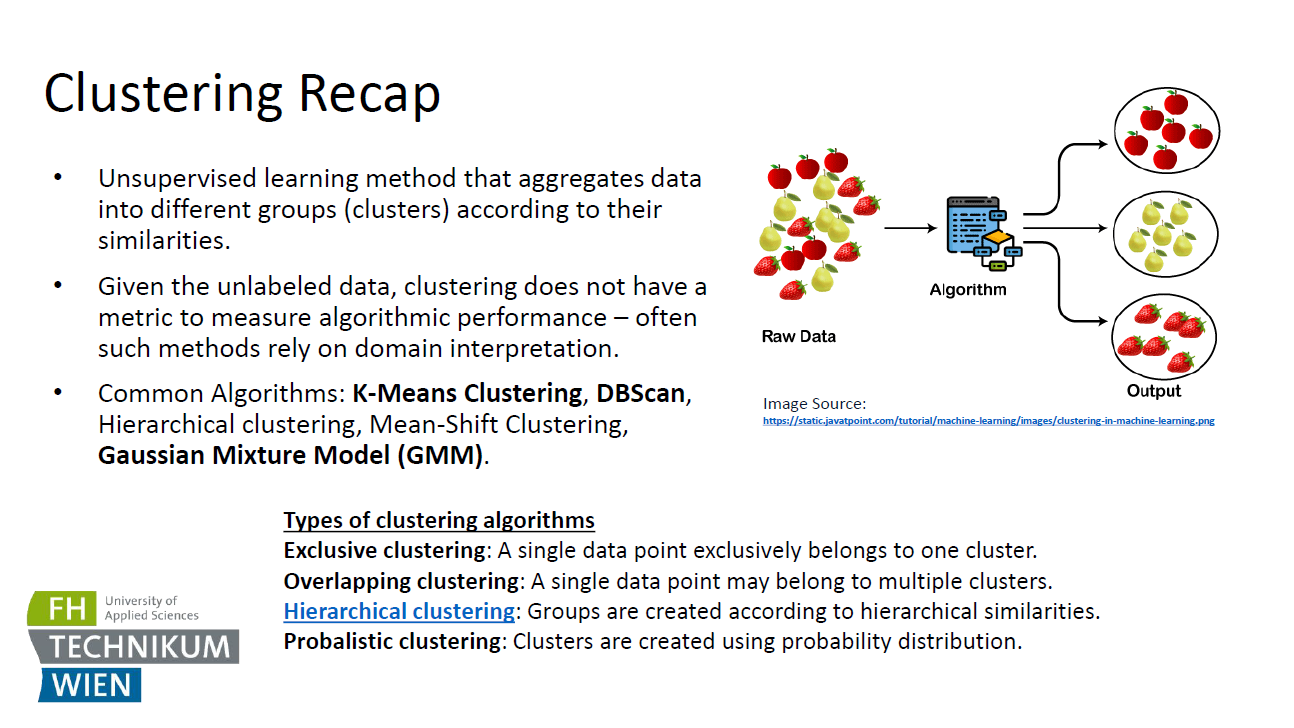

Thank you.

---

**Before diving deeper into DBSCAN, let’s quickly recap clustering as a concept.**

Clustering is an **unsupervised learning method**. That means it works without labeled data—no predefined categories or answers. Instead, the goal is to **group data points based on their similarities**, so that those within the same group (or *cluster*) are more similar to each other than to those in other groups.

Since we don’t have labels, one major challenge with clustering is **evaluating performance**. There’s no “ground truth” to compare against. As a result, clustering quality is often judged through **domain knowledge**, visualization, or internal metrics like silhouette scores.

Several algorithms are commonly used for clustering:

* **K-Means Clustering**: Partitions the data into *k* clusters by minimizing intra-cluster variance.
* **Hierarchical Clustering**: Builds a tree of clusters through either a bottom-up or top-down approach.
* **Mean-Shift Clustering**
* **Gaussian Mixture Models (GMM)**
* And of course, **DBSCAN**, our main focus today.

At the bottom of the slide, we also see a categorization of clustering methods:

* **Exclusive clustering**: Each data point belongs to exactly one cluster (e.g., k-means).
* **Overlapping clustering**: Points can belong to multiple clusters.
* **Hierarchical clustering**: Reflects nested grouping relationships.
* **Probabilistic clustering**: Assigns points based on probabilities, not hard boundaries (e.g., GMM).

As shown in the image, clustering can be visualized as the process of taking *raw data*—like a mix of fruits—and sorting it into separate, meaningful groups based on similarity.

Let’s now continue to the next slide.


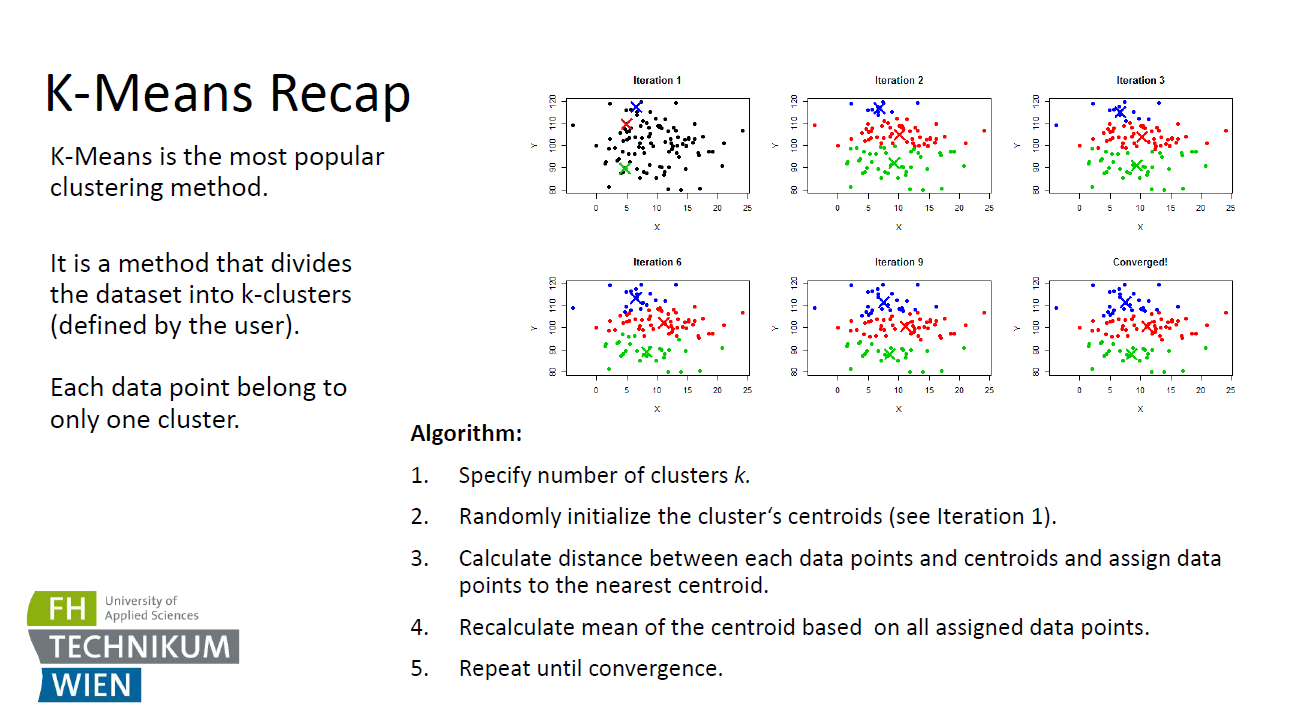

Thank you.

---

**Let’s briefly recap the most popular clustering method: K-Means.**

K-Means is a **centroid-based**, **exclusive clustering** algorithm. It partitions a dataset into *k* distinct clusters, where *k* is a value chosen by the user beforehand.

Each point in the dataset is assigned to exactly **one** cluster based on proximity to the nearest centroid.

### Here's how the algorithm works:

1. **Specify the number of clusters (*k*)**.
2. **Initialize** the centroids randomly (as seen in "Iteration 1" on the slide).
3. **Assign** each data point to the closest centroid using a distance metric—typically Euclidean distance.
4. **Recalculate** the centroid of each cluster based on the mean of the assigned points.
5. **Repeat** steps 3 and 4 until the centroids no longer change significantly—this is known as *convergence*.

### The visualization above:

We see the step-by-step convergence over multiple iterations. Initially, the centroids are poorly placed. Over time, they adjust their positions as points are reassigned and centroids are updated. By **Iteration 9**, the clusters have stabilized.

### But here’s the limitation:

* K-Means assumes spherical clusters of similar size.
* It struggles with clusters of arbitrary shapes or when noise is present.
* And most importantly, **you need to define *k* in advance**.

This is where DBSCAN offers a powerful alternative, as we’ll see next.

Let’s go on.


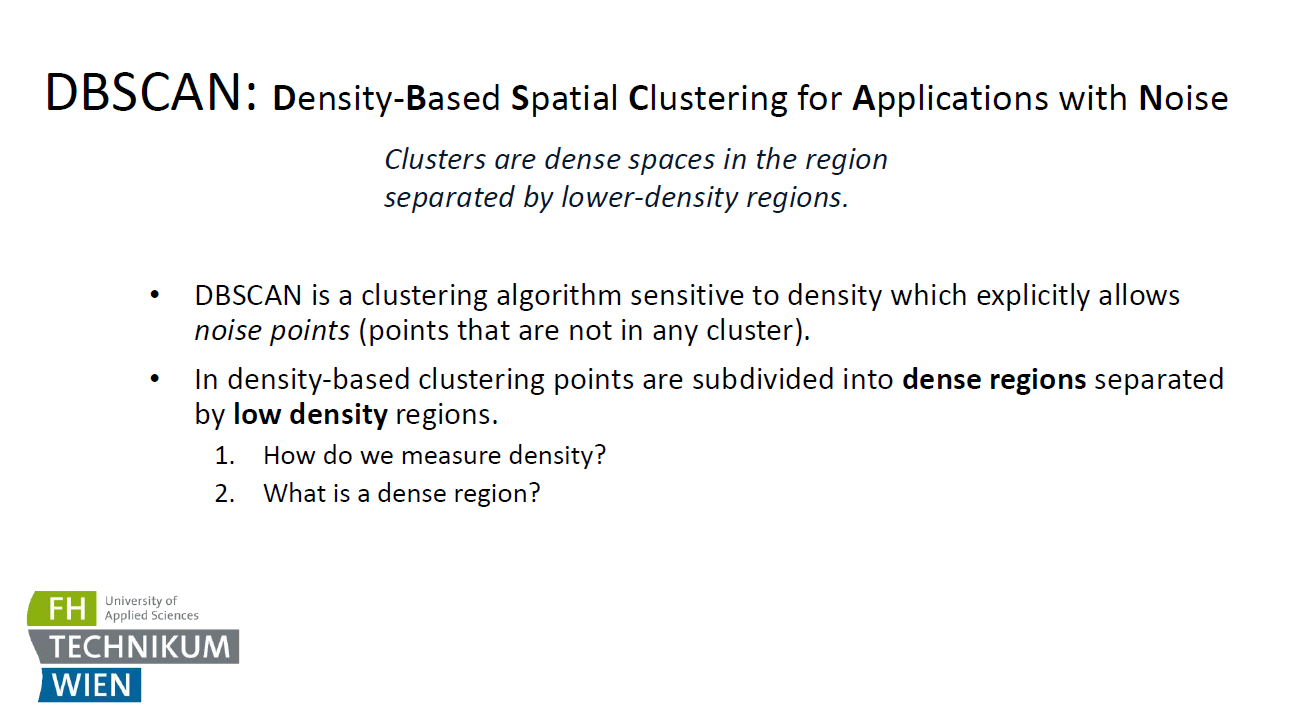

Thank you.

---

**Let’s now introduce DBSCAN: Density-Based Spatial Clustering of Applications with Noise.**

DBSCAN is a **density-based clustering algorithm** that detects clusters as areas of **high data point density**, surrounded by regions of **low density**. One of its most important features is its ability to explicitly identify **noise points**—data points that do not belong to any cluster.

This is a major advantage over traditional clustering methods like k-means, which force every point into a cluster regardless of whether it truly fits.

> As the quote in the slide summarizes:
> **Clusters are dense spaces in the region separated by lower-density regions.**

### The key ideas behind DBSCAN:

* It does **not require the number of clusters to be specified**.
* It can find **arbitrarily shaped clusters**.
* It’s **robust to outliers**—which it labels as *noise*.

### At this point, we ask two central questions:

1. **How do we measure density?**
   This will involve setting parameters like `eps` (radius) and `minPts` (minimum number of points).
2. **What defines a dense region?**
   A region is considered dense if there are enough data points within a certain radius.

These questions form the basis of how DBSCAN works—and we’ll answer them step by step in the coming slides.

Let’s continue.


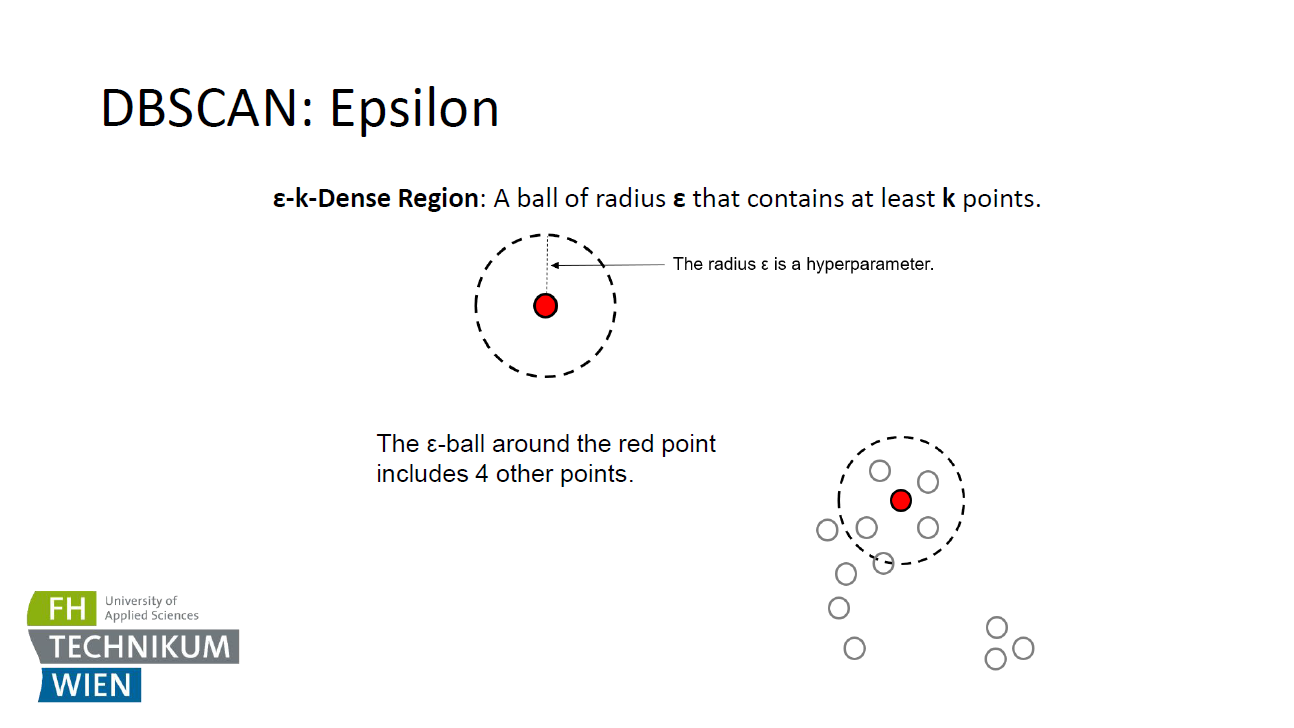

Thank you.

---

**Let’s now look at one of DBSCAN’s key parameters: 𝜀 (epsilon).**

In DBSCAN, **density** is measured using a concept called the **𝜀-neighborhood**—a circular region (or “𝜀-ball”) around a point, with radius 𝜀.

> A region is considered *dense* if the 𝜀-ball contains at least **k** other points.
> In this slide, that’s called an **𝜀-k-dense region**.

### A few key notes:

* **𝜀 (epsilon)** is a **hyperparameter**. It defines the size of the neighborhood we use to check density.
* **k** is often referred to as **MinPts**—the minimum number of points required to form a dense region.

As shown in the bottom-right illustration:

* The red point is at the center of the 𝜀-ball.
* There are 4 other points within this radius → the total is 5 points (including the center).
* If our chosen `MinPts = 5`, this would qualify as a **core point**.

In summary:

* **Epsilon defines the radius** used to search for neighbors.
* **MinPts sets the density threshold.**

Together, these parameters control how DBSCAN identifies core areas of high density and separates them from sparse, noisy regions.

Let’s proceed to the next slide to see how this leads to the classification of points.


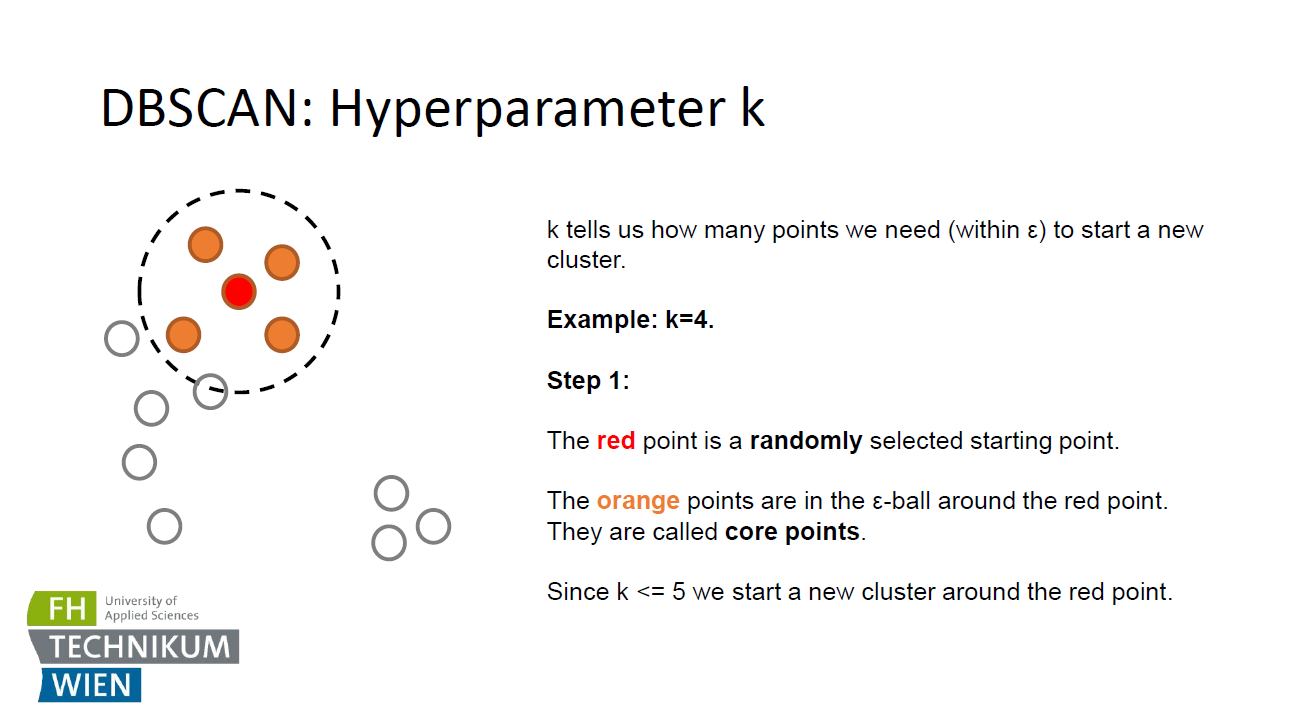

Thank you.

---

**Now let’s focus on the second key hyperparameter in DBSCAN: 𝑘, also known as MinPts.**

### What does **𝑘** represent?

It tells us **how many points must be within an 𝜀-radius** to consider the region around a point dense enough to form a cluster.

> In this example, **𝑘 = 4**.

### Step-by-step explanation:

1. We **randomly select a point**—in this case, the **red point**.
2. We draw a circle with radius 𝜀 around it. This is the **𝜀-ball**.
3. Inside this 𝜀-ball, we find other points—shown here in **orange**.
4. If the number of points within that circle is **greater than or equal to 𝑘**, the red point is considered a **core point**, and a **new cluster is started**.

In this case:

* There are **4 orange points** plus the red point itself, totaling 5.
* Since that satisfies the threshold (𝑘 ≤ 5), a **new cluster is initiated**.

So to recap:

* **𝜀 defines the neighborhood size**.
* **𝑘 defines the density requirement**.
* Together, they determine whether a point is dense enough to start or expand a cluster.

Let’s proceed to see how DBSCAN continues from this starting point.


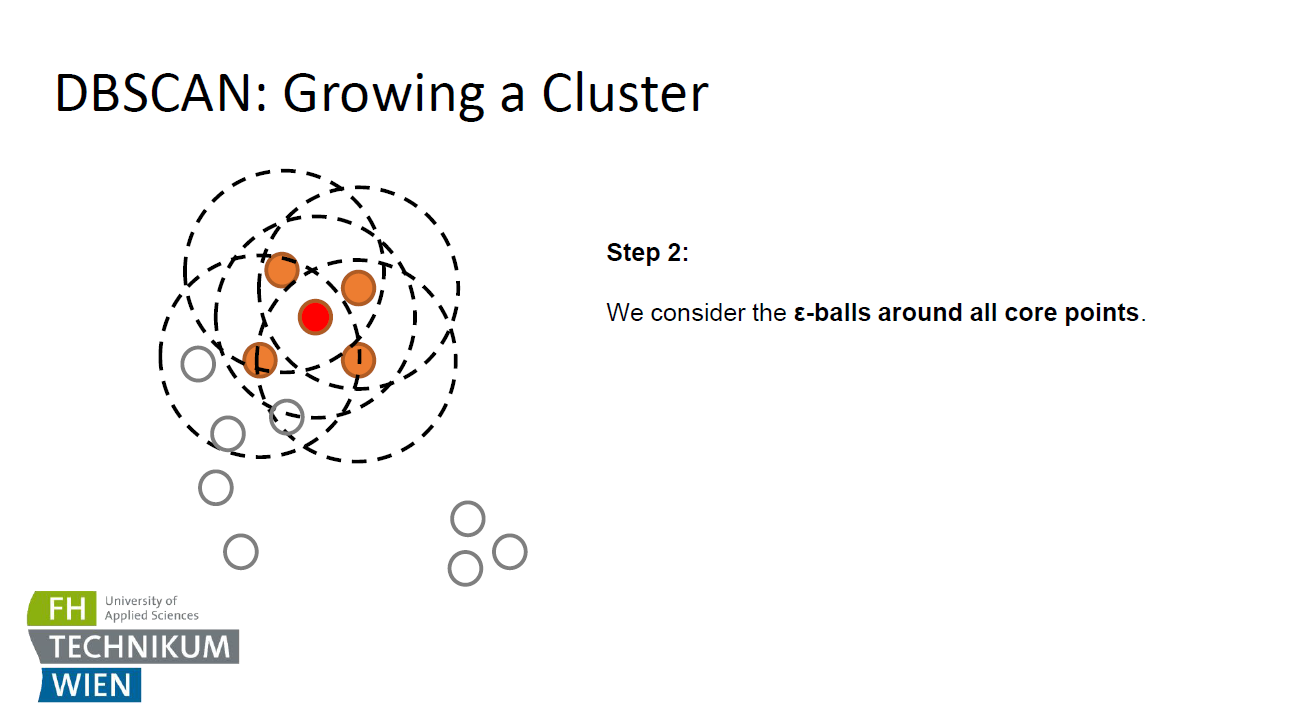

Thank you.

---

**Step 2: Growing the cluster.**

Now that we’ve identified a **core point** and initialized a cluster, the next step in DBSCAN is to **expand** that cluster by exploring its neighborhood.

> **We do this by drawing 𝜀-balls around *each core point*.**

Here’s what’s happening in the image:

* We started with the **red core point**, which had enough neighbors to begin a cluster.
* We now check the **𝜀-neighborhoods of all orange core points** that were within the red point’s radius.
* If any of *their* 𝜀-balls include enough points (≥ MinPts), they are also treated as **core points**, and the cluster continues growing.

This is how DBSCAN **propagates clusters outward**, chaining together densely connected regions.

So:

* If a point is reachable from another core point via a sequence of overlapping 𝜀-balls, it **belongs to the same cluster**.
* This process continues until **no new core points are found** within the expanding boundary.

This mechanism allows DBSCAN to detect **clusters of arbitrary shapes**—something centroid-based algorithms like k-means cannot do.

Let’s move on to the next slide to see how DBSCAN handles points that are not part of any cluster.


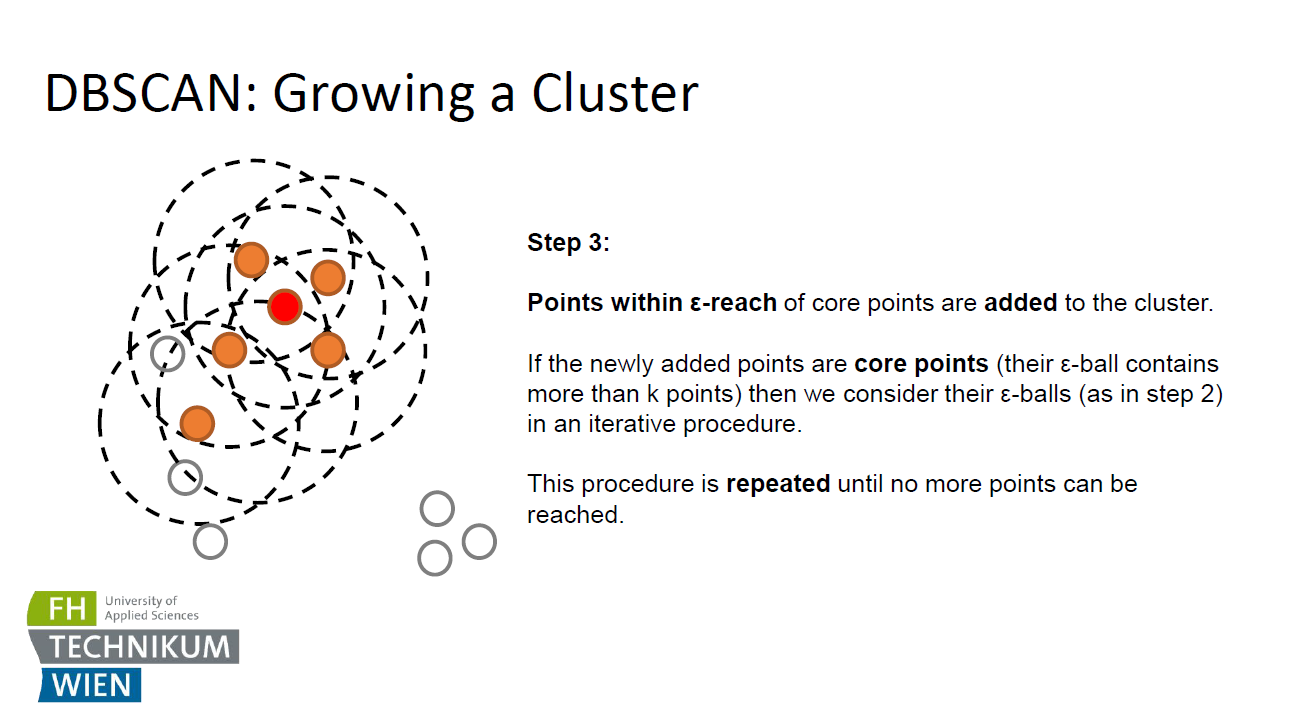

Thank you.

---

**Step 3: Continue growing the cluster by exploring 𝜀-reach.**

At this point, we’ve started a cluster and identified initial **core points**. Now, DBSCAN proceeds by **expanding** this cluster outward.

> **We add all points within the 𝜀-neighborhood (𝜀-reach) of core points.**

Let’s break this down:

* Every point within the 𝜀-ball of a core point is a **candidate** for the cluster.
* If any of those new points **also qualify as core points**, we repeat the process:

  * Draw 𝜀-balls around them,
  * Add their neighbors,
  * Check if *those* are core points, and so on.

This results in a **recursive, expanding wave** of cluster growth that continues **until no more points** satisfy the core condition or can be reached.

So DBSCAN’s clustering is:

* **Density-reachable**: All points reachable through chains of overlapping 𝜀-neighborhoods are added to the same cluster.
* **Iterative**: It keeps expanding outward from each new core point.

In this visual, you can clearly see how the cluster has grown outward from the initial red point into a dense region composed of multiple core points and their neighbors.

Let’s now proceed to see what happens to points that don’t qualify as core or reachable points—those are the *noise*.


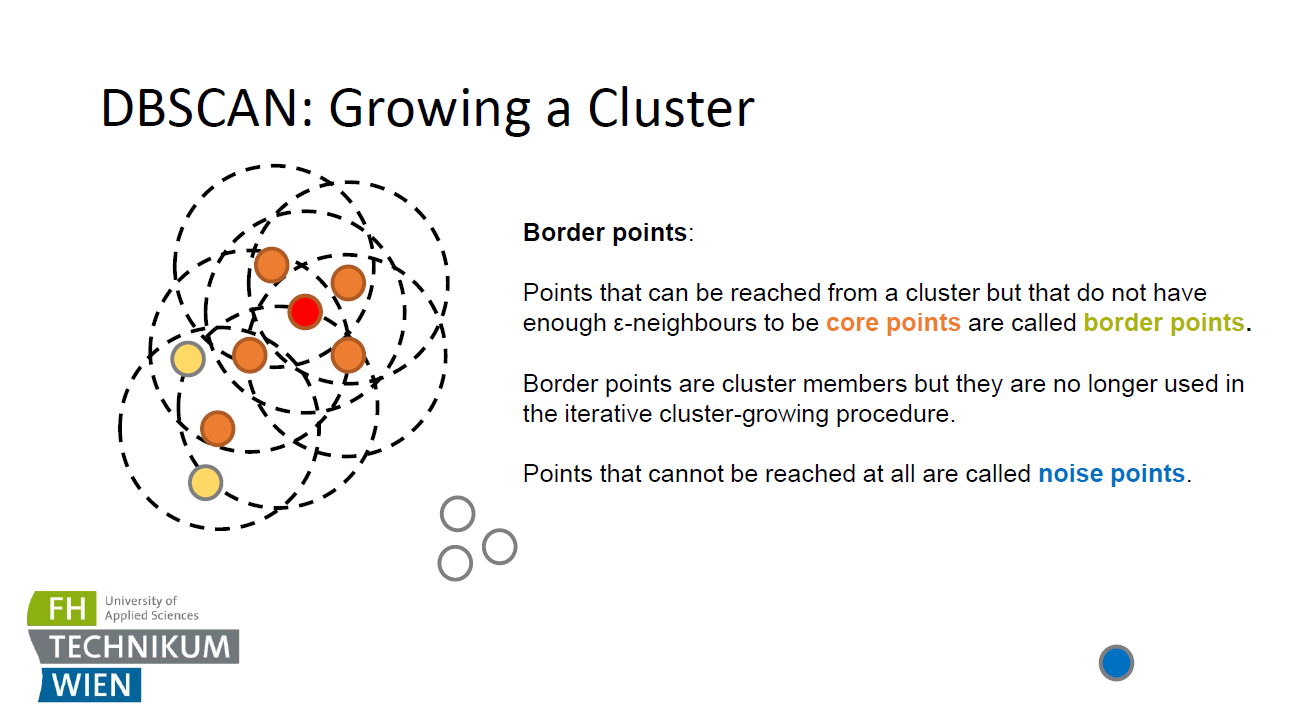

Thank you.

---

**Let’s complete our cluster expansion process by defining the last two types of points in DBSCAN: border points and noise points.**

### 1. **Border points**

These are points that:

* **Lie within the 𝜀-neighborhood of a core point**, and
* Do **not have enough neighbors** to be core points themselves (i.e. fewer than *k* neighbors).

> In the diagram, the **yellow points** are **border points**.

They are considered part of the cluster because they are **reachable from core points**, but they **don’t contribute to further cluster growth**. Once identified, they are **included** in the cluster but **not expanded** further.

### 2. **Noise points**

These are points that:

* Are **not reachable from any core point**, and
* Do **not belong to any cluster**.

> These are labeled in **blue** in the diagram (bottom right corner).

Noise points are **outliers**. DBSCAN is powerful because it doesn’t force every point into a cluster—**it allows noise to exist explicitly**, which increases robustness in messy or real-world data.

### Summary of point types in DBSCAN:

| Type             | Condition                                      | Role                         |
| ---------------- | ---------------------------------------------- | ---------------------------- |
| **Core point**   | ≥ *k* neighbors within 𝜀                      | Starts and expands cluster   |
| **Border point** | < *k* neighbors, but within 𝜀 of a core point | Part of cluster, but passive |
| **Noise point**  | Not reachable from any core point              | Excluded from clusters       |

With this, we now have a complete view of how DBSCAN builds clusters and handles different point types. Let's continue to see it in action or compare it with other algorithms.


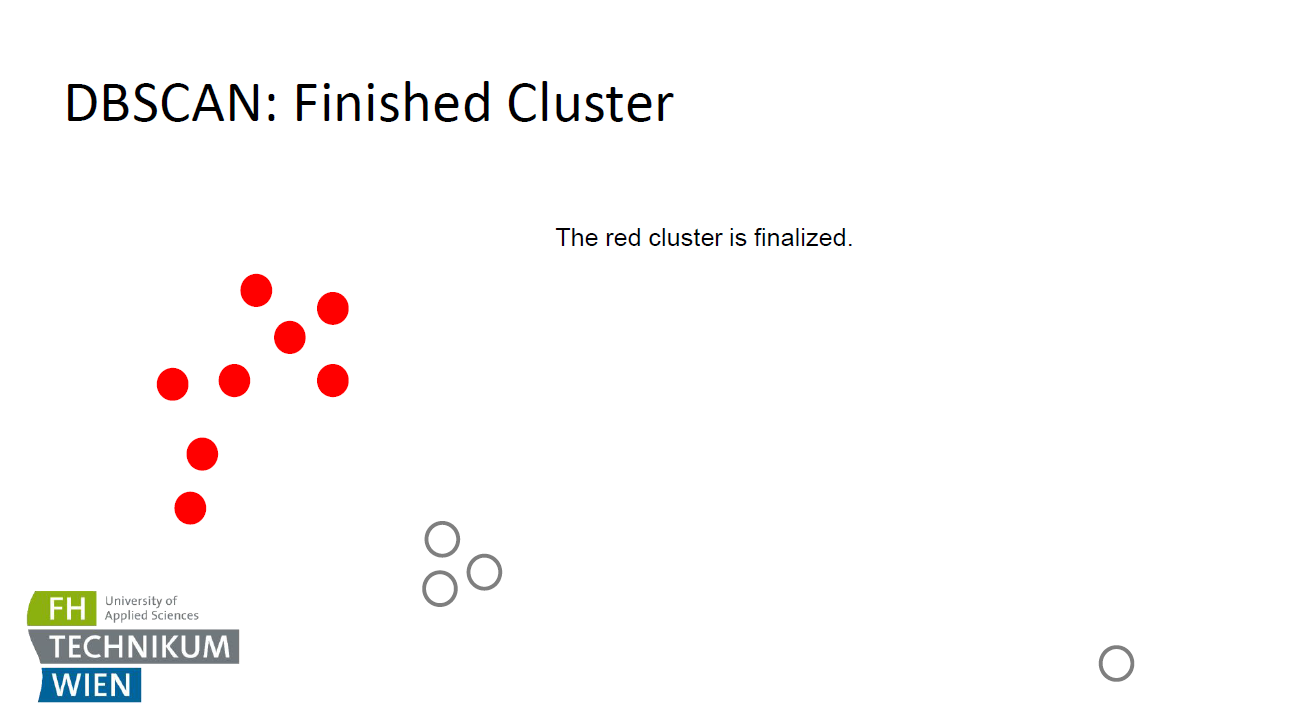

Thank you.

---

**Here we see the result: a finalized cluster.**

This slide shows the **end of the DBSCAN process** for one cluster—here, the **red cluster**.

After:

* identifying an initial **core point**,
* expanding through neighboring **core points**,
* including all **border points** connected to them,

…the algorithm stops when **no more density-reachable points remain**.

What remains is a **cohesive group of points**, formed by natural density—not forced boundaries or predefined cluster counts.

The **gray points** in this slide:

* May still become part of other clusters (if dense enough),
* Or they may ultimately be classified as **noise** if they remain unreachable.

This process then **restarts** from another unvisited point, and the algorithm attempts to grow another cluster in the same way.

So DBSCAN continues until:

* All points are either **clustered**, or
* Labeled as **noise**.

Let’s move on to review the advantages and limitations of DBSCAN.


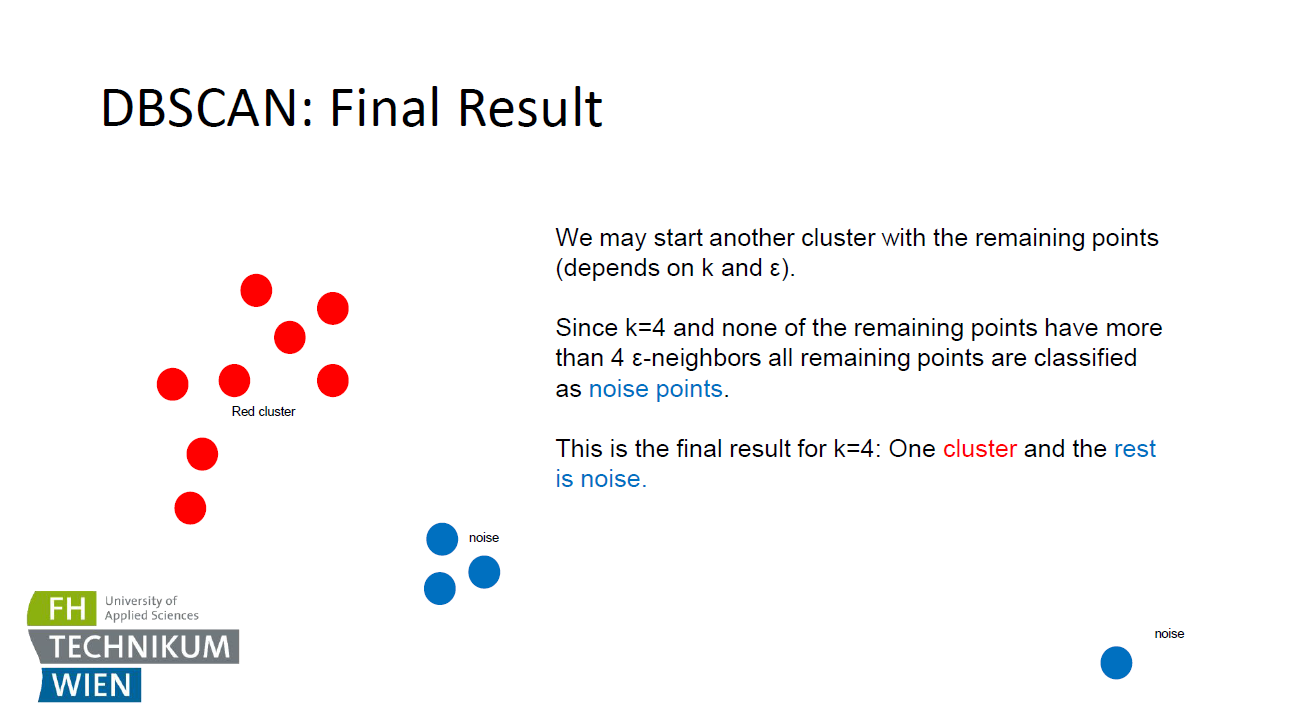

Thank you.

---

**This brings us to the final result of the DBSCAN algorithm.**

On this slide, we see the outcome of running DBSCAN with:

* **𝑘 = 4** (MinPts),
* A chosen **𝜀-radius**.

### Outcome:

* One **red cluster** was successfully formed where the density was high enough (≥ 4 neighbors).
* The remaining points—shown in **blue**—did not have enough neighbors within their 𝜀-balls to qualify as core points.
* As a result, they were **not added to any cluster**, and are instead classified as **noise points**.

> "This is the final result for k=4:
> One cluster and the rest is noise."

The algorithm **did attempt** to start new clusters with the remaining points, but **none of them satisfied the density conditions**, so no further clusters were formed.

### Final insights:

* DBSCAN naturally filters out **sparse or isolated points** as noise.
* It does **not require the number of clusters to be set in advance**.
* The final clustering depends on two critical values: **𝜀** and **𝑘**.

Let’s move forward to summarize the **advantages and limitations** of DBSCAN.


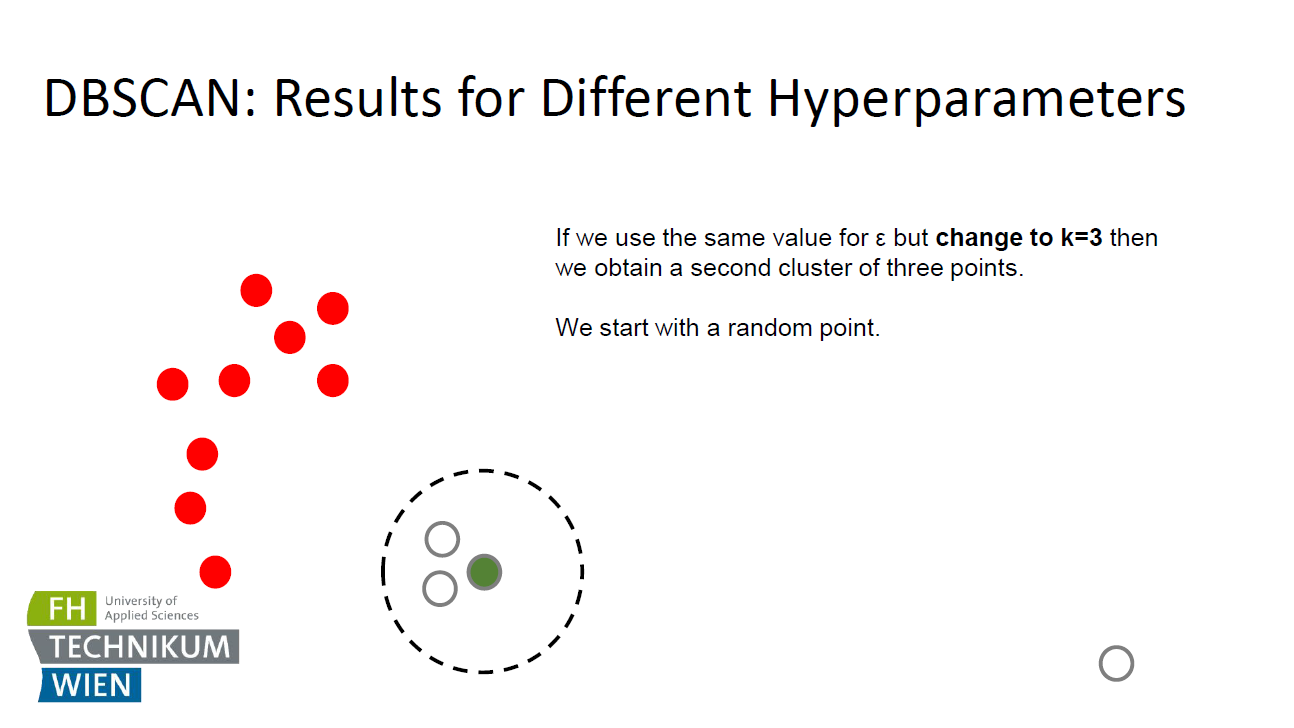

Thank you.

---

**This slide demonstrates how DBSCAN’s results are sensitive to hyperparameter choices.**

### Previously:

* We used `𝑘 = 4` and got **one cluster** (the red one), while the rest were treated as **noise**.

### Now:

* We **keep the same 𝜀**, but **change 𝑘 to 3**.
* As a result, a new region—previously too sparse—now qualifies as dense enough to start a **second cluster**.

In the image:

* A **green point** is randomly chosen to begin.
* Its 𝜀-neighborhood now contains **3 additional points**, which meets the new lower threshold: **MinPts = 3**.
* This allows DBSCAN to initiate a **new cluster** in a region that was previously considered noise.

### Key insight:

DBSCAN’s effectiveness depends on carefully tuning:

* **𝜀** – the size of the local neighborhood.
* **𝑘 (MinPts)** – the threshold for density.

> A value too high might cause **true clusters to be missed**.
> A value too low might **merge noise or distinct clusters** into one.

This flexibility is powerful—but it also means **parameter selection is critical**, and often requires **domain knowledge or experimentation**.

Let’s continue to explore more cases or conclude with pros and cons.


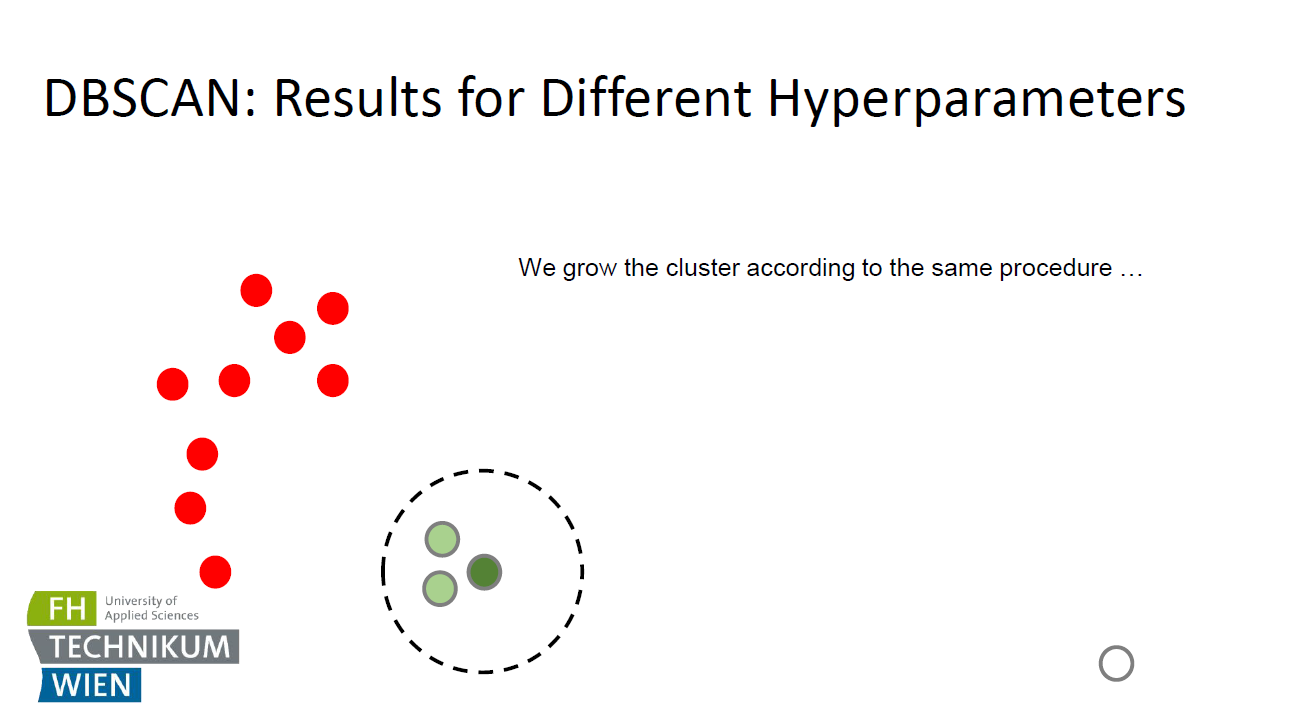

Thank you.

---

**Continuing with the adjusted parameters (𝑘 = 3), DBSCAN grows the new cluster using the same procedure.**

Just like we saw before:

* We started with a **random point**—now shown in **dark green**.
* Its 𝜀-neighborhood contained **enough points** (at least 3 including itself), so a **new cluster was initialized**.
* Now we apply the **exact same cluster-growing steps**:

  1. Identify **core points** within the 𝜀-ball,
  2. Expand to their neighbors,
  3. Repeat the process until no new points qualify.

Here, the **light green** points are being added to the new cluster, either as **core points** or **border points** depending on their neighborhood density.

This visual emphasizes that:

* **Changing just one hyperparameter** can significantly **alter the outcome**,
* DBSCAN is flexible and powerful, but **requires careful tuning**,
* The **clustering logic stays the same**, no matter the values of 𝜀 and 𝑘.

Let’s go to the final visual confirmation of this second cluster.


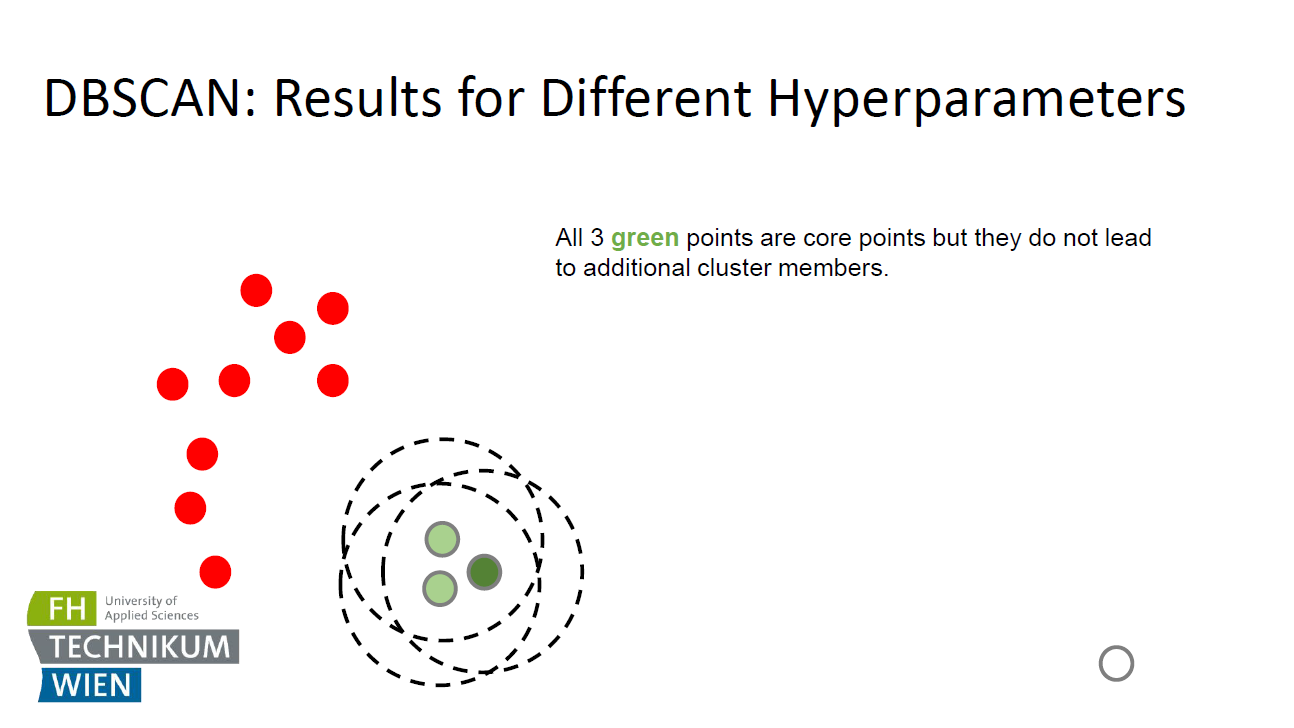

Thank you.

---

**This slide shows the outcome of our second cluster after lowering 𝑘 to 3.**

As we can see:

* All **three green points** have become **core points**, because each has at least 3 neighbors (including itself) within the 𝜀-radius.
* However, these points are **only connected to each other**—there are **no additional points nearby** to expand the cluster further.

So:

* A **small, valid cluster** has been formed,
* But **cluster growth terminates quickly** since no new core points are discovered beyond this trio.

This highlights a key behavior of DBSCAN:

> The **structure and number of clusters** discovered depend heavily on the **local density** and the selected hyperparameters.

In this case, by **reducing 𝑘**, we were able to identify **smaller clusters** that were previously ignored. This can be useful when your data contains **tight, sparse groupings**, but also increases the risk of **capturing noise as clusters** if 𝑘 is too low.

Let’s now move to the final slide and wrap up with a summary of DBSCAN’s key strengths and limitations.


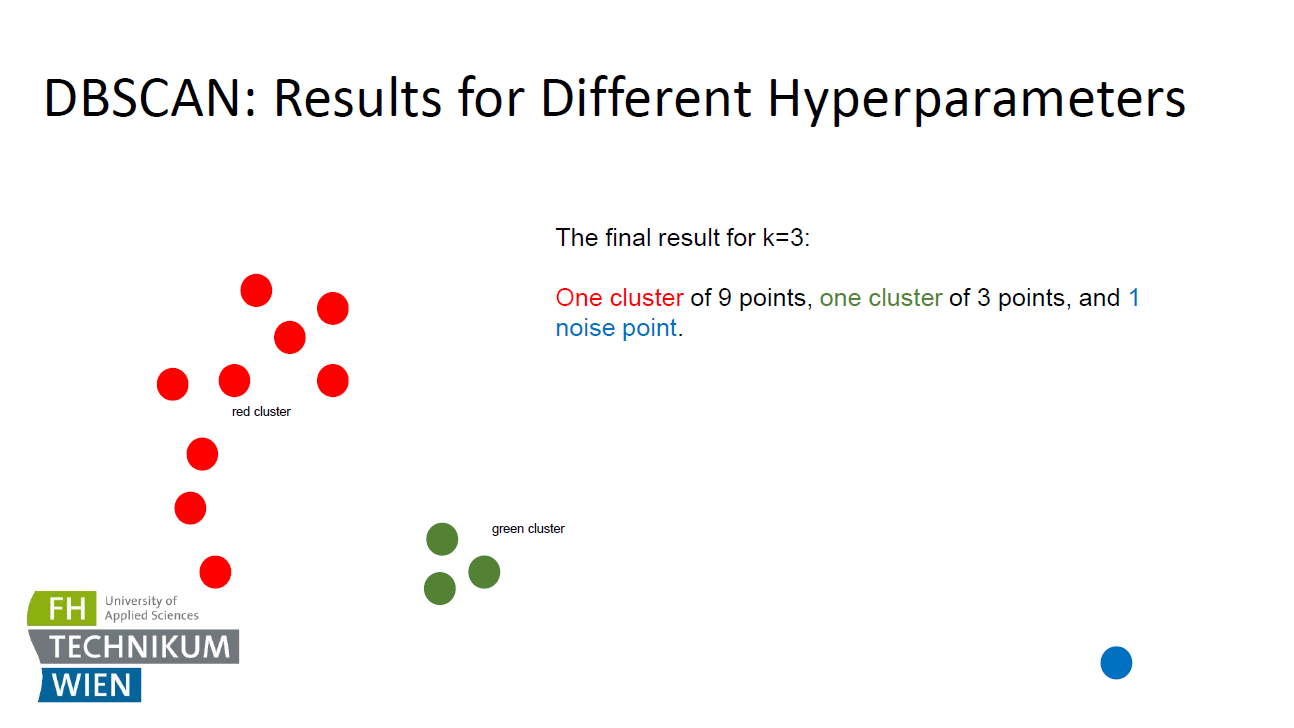

Thank you.

---

**And here we have the final result for 𝑘 = 3.**

By reducing the **density threshold**, DBSCAN now detects:

* ✅ **One red cluster** with **9 points** (as before),
* ✅ **One green cluster** with **3 points** (newly formed due to the lower 𝑘),
* ❌ **One blue noise point**—still too isolated to be assigned to any cluster.

### Final takeaway:

This clearly demonstrates how **hyperparameters affect the outcome** of DBSCAN:

* A **higher 𝑘** (e.g., 4) led to **one cluster + lots of noise**.
* A **lower 𝑘** (e.g., 3) made the algorithm **more sensitive to smaller groups**, creating an additional cluster and reducing the number of noise points.

This slide nicely concludes the process and highlights the balance we must strike:

* Setting 𝑘 **too high** → real clusters might be missed.
* Setting 𝑘 **too low** → risk of capturing noise as clusters.

Now that we’ve walked through the mechanics and parameter tuning, we can wrap up with a summary of **advantages, limitations, and use cases** of DBSCAN if that is part of your final slide. Would you like to continue?


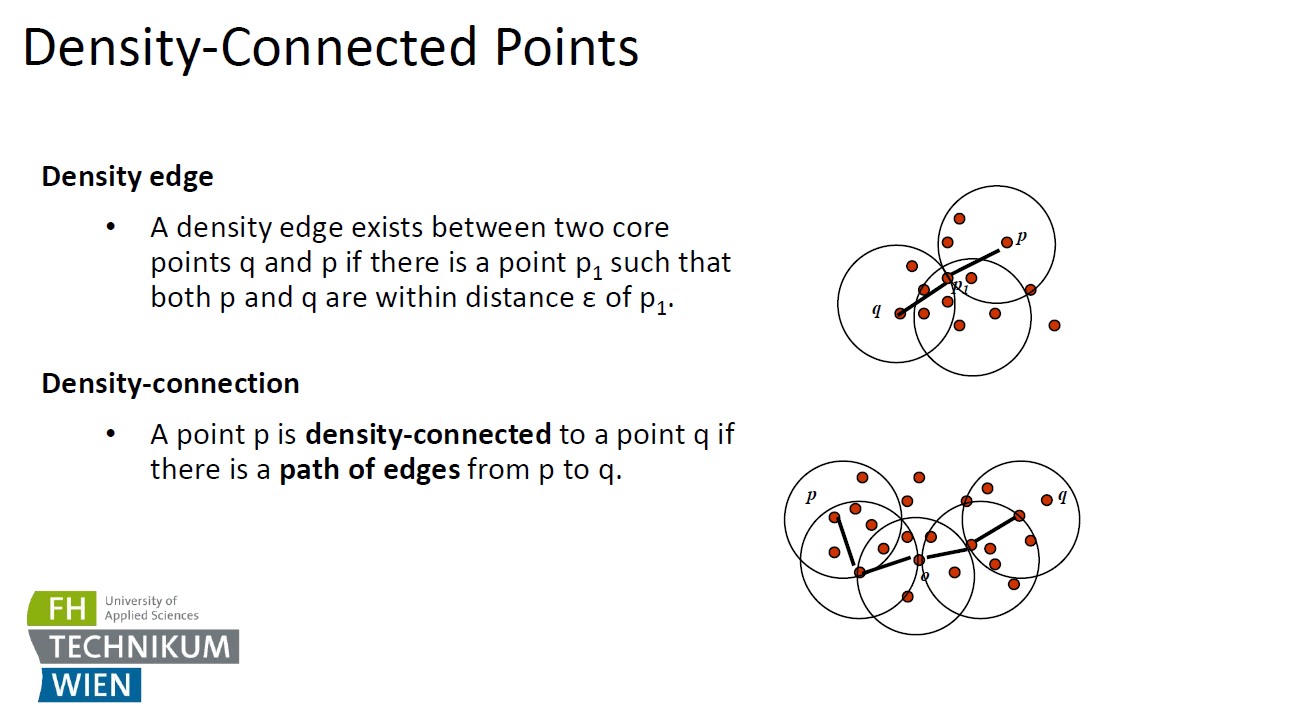

Thank you.

---

**Before concluding, let’s formalize two key concepts in DBSCAN: *density edge* and *density-connection*.**

These definitions explain **how clusters are formed through connected dense regions**.

---

### 🔗 **Density edge**

* A **density edge** exists between **two core points**, say **p** and **q**,
* if there is a third point **p₁** such that **both p and q are within distance 𝜀 of p₁**.
* This implies that their **𝜀-balls overlap through a common neighbor**, allowing connection.

➡️ **Visual (top-right)**: You can see p and q both inside the 𝜀-neighborhood of p₁, forming a direct edge.

---

### 🧭 **Density connection**

* A point **p** is said to be **density-connected** to another point **q**
* if there exists a **path of density edges** from p to q.
* This allows **indirect connections** between points across several overlapping 𝜀-balls.

➡️ **Visual (bottom-right)**: Although p and q don’t overlap directly, there’s a **chain of intermediate core points** linking them through density edges.

---

### Why this matters:

* This concept of **density-connectivity** is what enables DBSCAN to form **arbitrarily shaped clusters**,
* As long as a **path of dense neighborhoods exists**, the algorithm considers all linked points part of the **same cluster**.

We’ll now wrap up with a summary slide or slide on DBSCAN’s pros and cons, if available. Ready when you are.


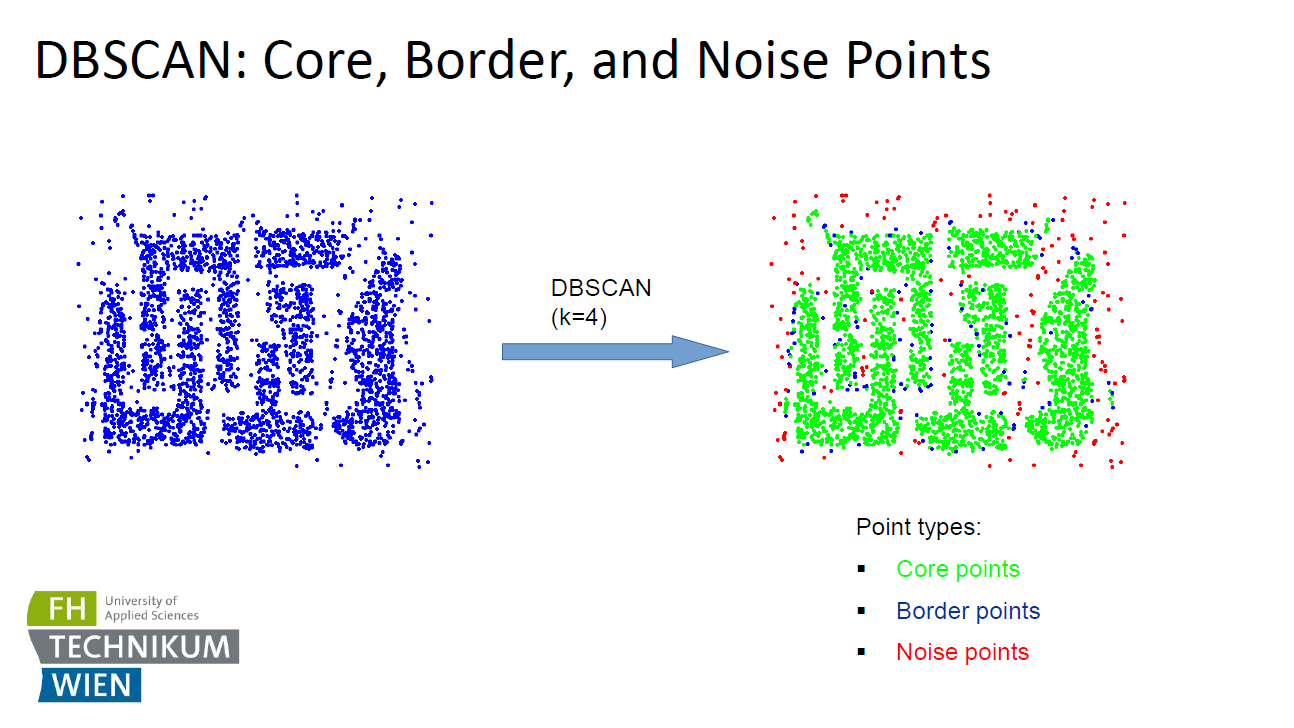

Thank you.

---

**This slide offers a great visual summary of DBSCAN in action.**

We see the transition from a raw dataset (left) to a **density-based partitioning** (right) using DBSCAN with `k = 4`.

### 💠 Point classifications:

* 🟩 **Core points (green)**:
  These are located in dense regions. They have enough neighbors in their 𝜀-ball (at least 4). They serve as the structural backbone of clusters.

* 🔵 **Border points (blue)**:
  These lie within 𝜀 of a core point, but do **not** have enough neighbors to be core themselves. They **belong to clusters**, but don’t contribute to further expansion.

* 🔴 **Noise points (red)**:
  These cannot be reached from any core point. They don’t belong to any cluster and are treated as **outliers**.

### Why this matters:

This image highlights one of DBSCAN’s major strengths—its ability to:

* Discover **arbitrarily shaped clusters**,
* Clearly **isolate noise**,
* And classify all points into **core, border, or noise** roles.

It shows that DBSCAN is well-suited for **real-world data** where shapes are not spherical and noise is present.

---

This concludes the main walkthrough of DBSCAN.
Let me know if you have one final summary or conclusion slide to present—or if you'd like me to deliver the wrap-up statement for the session.


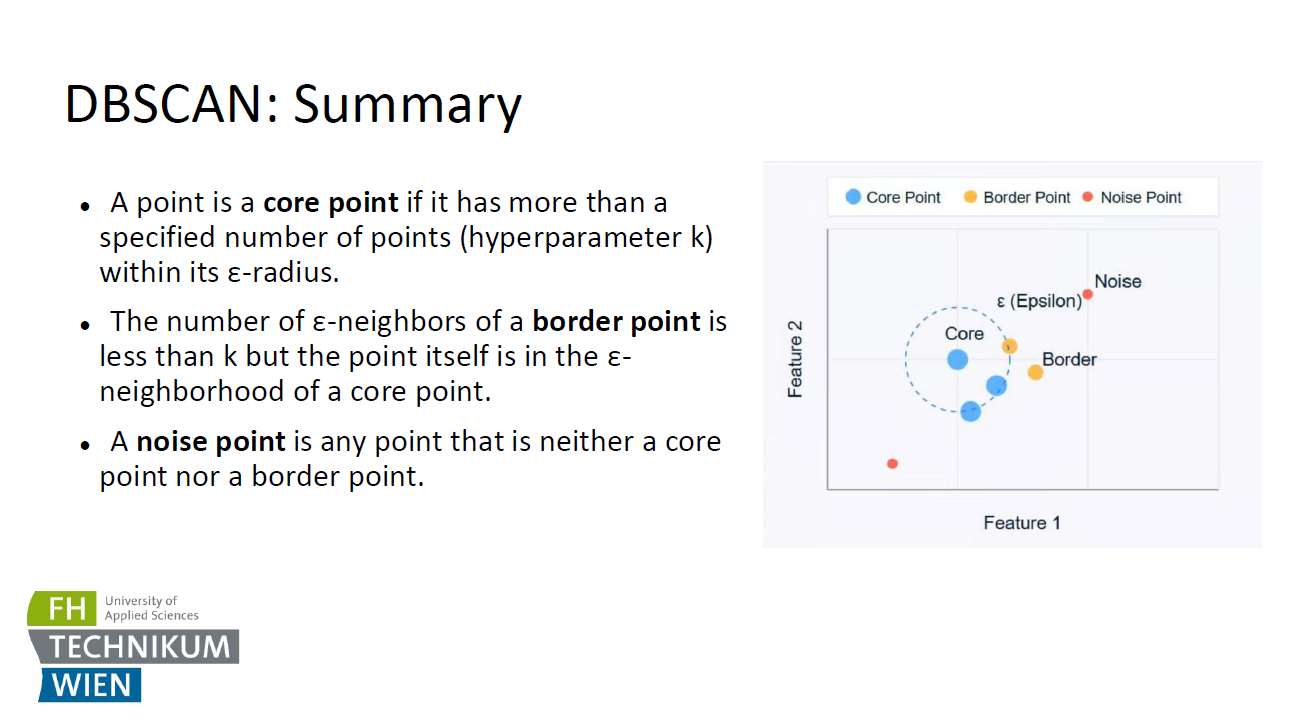

Thank you.

---

**Let’s conclude the presentation with a concise summary of DBSCAN.**

This slide neatly wraps up the core concepts and classifications that drive the DBSCAN algorithm:

---

### ✅ **Core Point**

* A point is a **core point** if it has **at least *k* neighbors** (including itself) **within its 𝜀-radius**.
* These points form the **dense core** of a cluster and enable expansion.

---

### ✅ **Border Point**

* A **border point** has **fewer than *k* neighbors** in its 𝜀-ball,
* but it **lies within the 𝜀-ball of a core point**, so it still belongs to the cluster.
* It does **not help expand the cluster** further.

---

### ❌ **Noise Point**

* A **noise point** is **not a core point**, and it’s also **not within the 𝜀-neighborhood of any core point**.
* These are **outliers**, excluded from all clusters.

---

### 🧠 Final thoughts:

* DBSCAN excels at discovering **clusters of arbitrary shapes**, **filtering out noise**, and **not requiring the number of clusters in advance**.
* However, careful **tuning of 𝜀 and *k*** is essential for good performance.

> Thank you for your attention! I hope this session gave you a clear and intuitive understanding of how DBSCAN works—and why it’s a valuable tool for unsupervised learning.

Let me know if you’d like help crafting a short verbal conclusion, discussion prompts, or Q\&A slide!


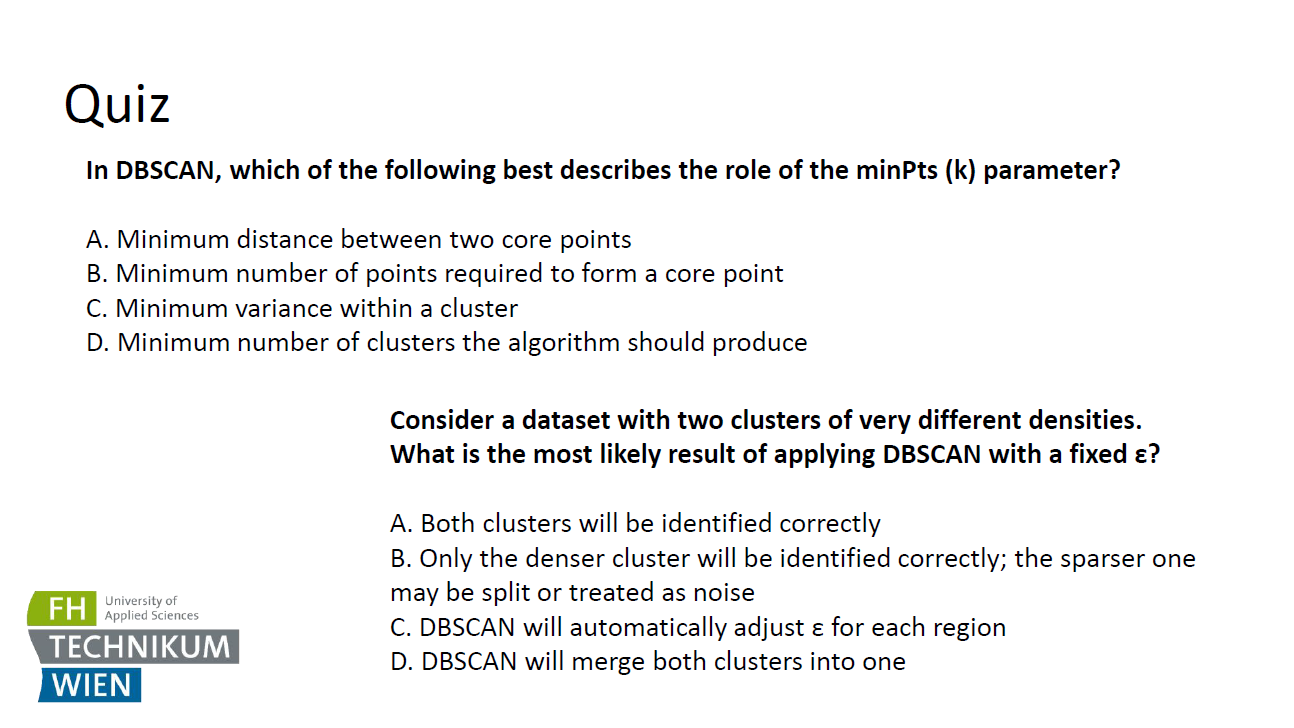

Perfect—let’s wrap up with this brief **quiz to check understanding** of DBSCAN’s key concepts:

---

### ❓**Question 1:**

**In DBSCAN, which of the following best describes the role of the minPts (k) parameter?**

✅ **Correct answer: B** — *Minimum number of points required to form a core point*

* **A** is incorrect → Distance is handled by 𝜀, not k.
* **C** is incorrect → DBSCAN does not use variance.
* **D** is incorrect → The number of clusters is **not** specified in DBSCAN.

---

### ❓**Question 2:**

**Consider a dataset with two clusters of very different densities.
What is the most likely result of applying DBSCAN with a fixed 𝜀?**

✅ **Correct answer: B** — *Only the denser cluster will be identified correctly; the sparser one may be split or treated as noise*

* **A** is incorrect → DBSCAN struggles when densities differ too much.
* **C** is incorrect → DBSCAN uses a **fixed 𝜀**; it doesn’t adapt dynamically.
* **D** is unlikely unless 𝜀 is so large that clusters overlap significantly.

---

These questions help reinforce the importance of **parameter tuning** and **understanding the nature of the data** when using DBSCAN effectively.

Would you like a PDF export of the full presentation script or the quiz in editable format?


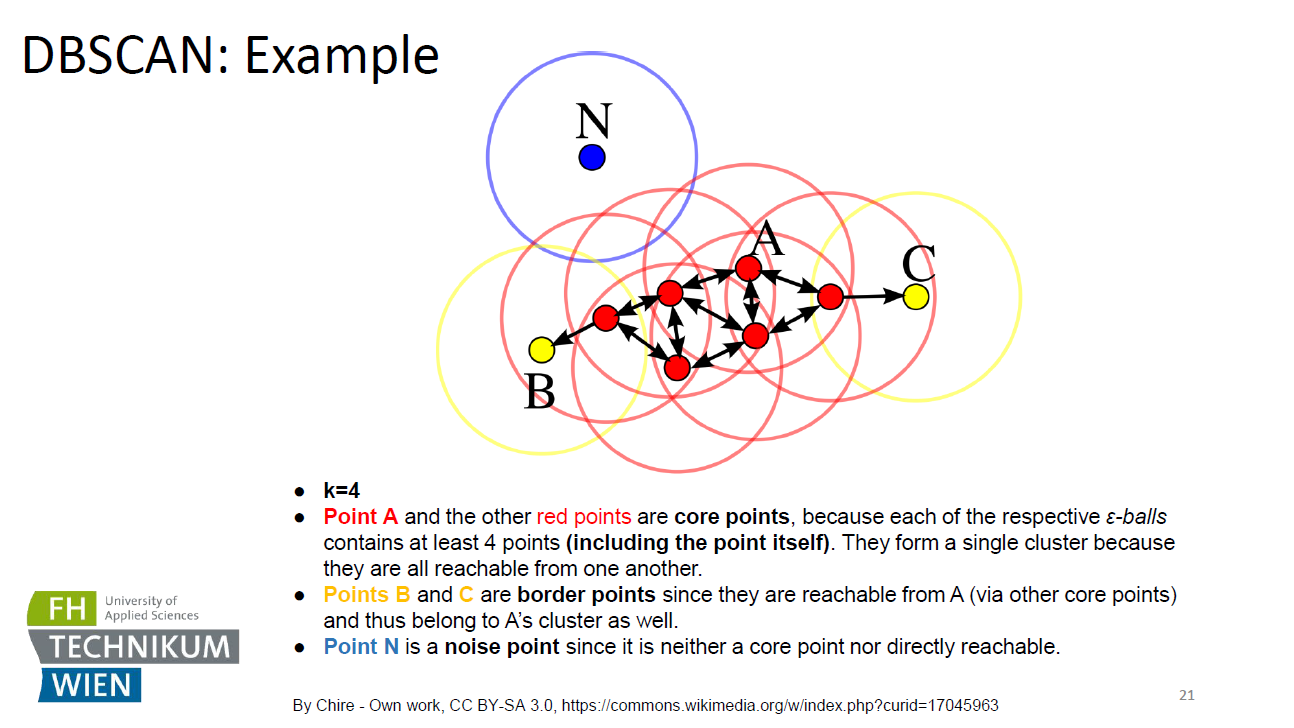

Thank you — this is an excellent **final example** to reinforce everything we’ve covered.

---

### 🔍 **Let’s walk through this DBSCAN example step-by-step**

(with **𝑘 = 4** and a fixed radius **𝜀** represented by the colored circles):

---

### 🟥 **Core Points (Red)**

* Point **A** and all the other **red points** are **core points**.
* Each of them has **at least 4 neighbors within its 𝜀-ball**, including itself.
* They form a **connected chain of dense points**, all **mutually reachable**.
* These constitute the **core structure** of a **single cluster**.

---

### 🟡 **Border Points (Yellow: B and C)**

* Points **B** and **C**:

  * Do **not** have enough neighbors (𝑘 < 4) to be core points themselves,
  * But are within 𝜀-distance of a **core point** (A or others),
  * So they are **assigned to the cluster**, but they **do not expand it**.

They are classic **border points**.

---

### 🔵 **Noise Point (Blue: N)**

* Point **N** is **not within 𝜀 of any core point**, and it also has **fewer than 4 neighbors**.
* It is **isolated** → thus, it is labeled as a **noise point**.

---

### 🧠 Final insight:

This example clearly visualizes how DBSCAN:

* Starts from core points,
* Grows through **density-reachable** chains,
* Includes **border points**, and
* Leaves **noise** unassigned.

---

That concludes the presentation on DBSCAN.
Would you like a printable PDF version, a recap slide, or some discussion prompts for your audience?


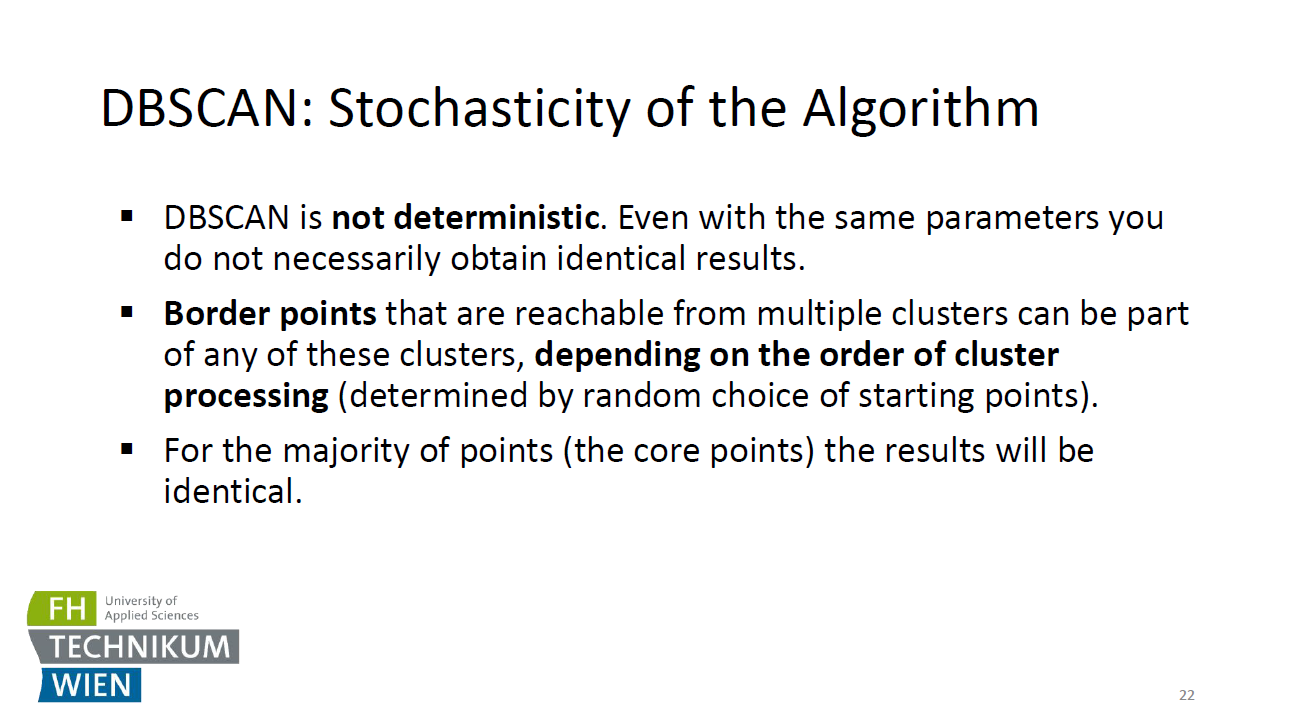

Excellent—this final slide touches on a subtle but important aspect of DBSCAN:

---

### 🎲 **Stochasticity of the DBSCAN Algorithm**

Although DBSCAN appears rule-based, it is **not fully deterministic**.

---

### ⚠️ Why?

* The **algorithm can yield slightly different results** even with **the same 𝜀 and 𝑘**.
* This is due to the **random order in which points are processed**—especially when it comes to **border points**.

---

### 🔁 What happens?

* **Border points** that are **reachable from more than one cluster** may be assigned **to different clusters**, depending on **which core point was visited first**.
* This doesn’t affect **core points**, which are always **clearly defined** and consistent in every run.

---

### ✅ In practice:

* **Most of the clustering remains stable**, especially in large, well-separated datasets.
* But you may see **minor differences** around cluster edges upon repeated runs.

---

This wraps up our presentation on DBSCAN.
If you’d like, I can now help generate:

* 📄 A summary slide
* 📘 A one-pager handout
* 🧪 Extra quiz questions
* 📦 Or package the whole script for export

Just let me know how you'd like to proceed!


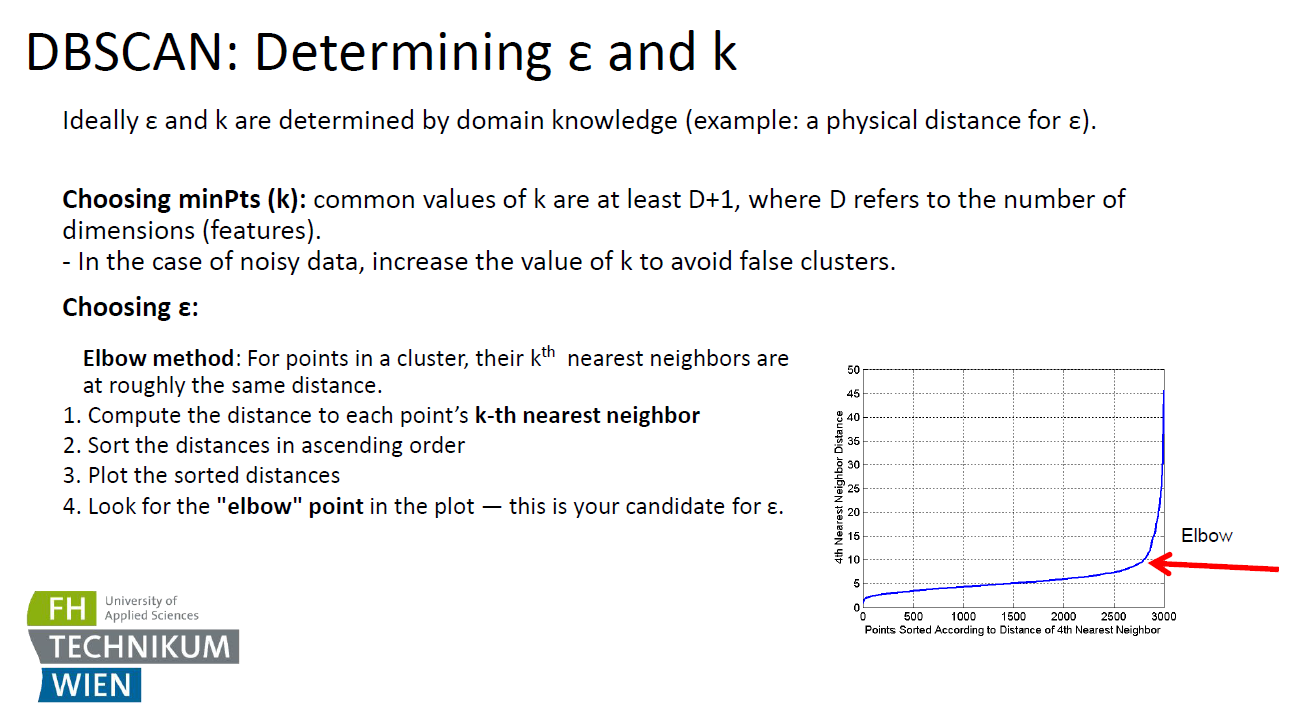

Excellent — this slide is a perfect way to **wrap up the practical side of DBSCAN** by addressing a common challenge:

---

### ⚙️ **How to choose the parameters 𝜀 and 𝑘 in DBSCAN?**

While DBSCAN is powerful, it **relies heavily** on good parameter tuning.

---

### 🔢 **Choosing minPts (𝑘):**

* A **common heuristic** is:

  > **𝑘 ≥ D + 1**,
  > where **D** is the number of **features (dimensions)**.
* **Higher 𝑘 values** help avoid false clusters in **noisy datasets**.

---

### 📐 **Choosing epsilon (𝜀): The Elbow Method**

1. For each point, compute the **distance to its 𝑘-th nearest neighbor**.
2. Sort these distances in **ascending order**.
3. Plot them.
4. **Look for the "elbow"** — a sharp change in slope.

   * This point often separates **dense regions** from **sparser ones**.
   * It’s a good candidate for **𝜀**.

> As shown in the plot:
> The **elbow** marks the transition from **clustered** to **isolated points**.

---

### 🧠 Key Insight:

* These parameters should ideally be guided by **domain knowledge**, such as expected **physical distance thresholds** or **expected density**.

This gives practitioners a **systematic way** to estimate DBSCAN’s key inputs instead of guessing blindly.

Let me know if you’d like a concluding recap slide, or a handout version of the entire walkthrough!


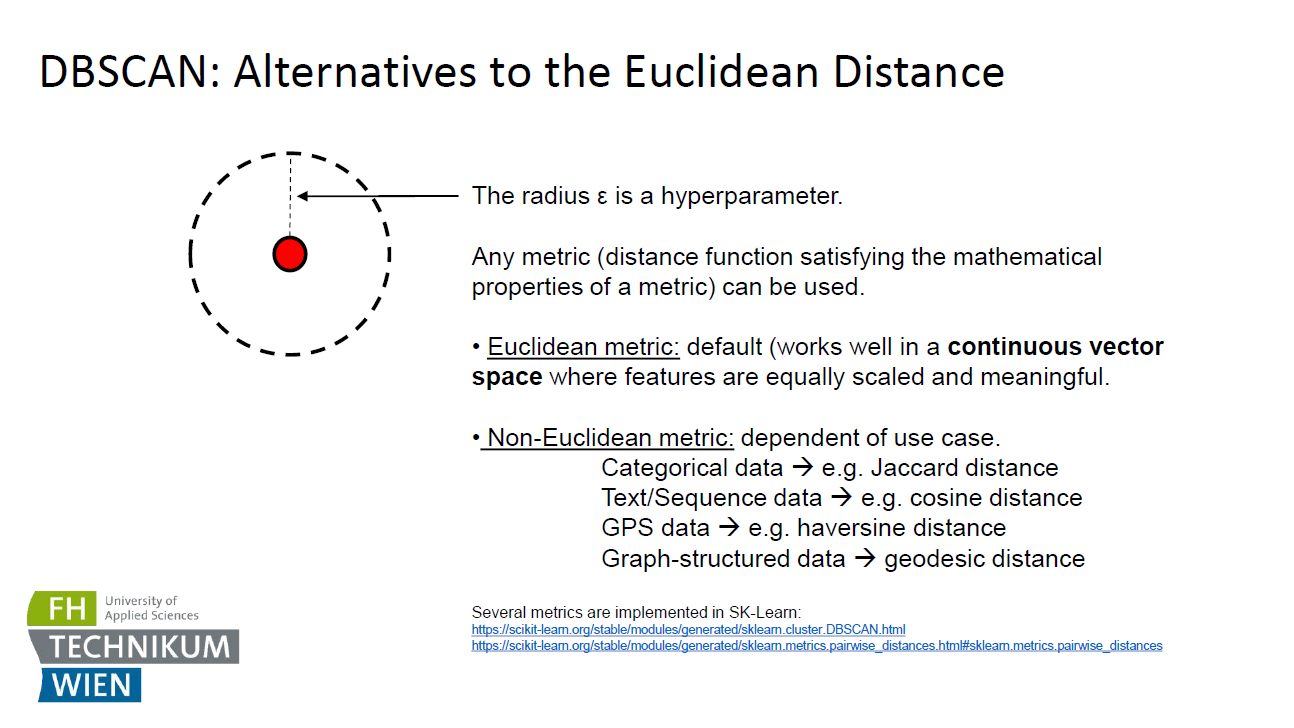

Great — this slide is the perfect addition to broaden the **applicability of DBSCAN** beyond basic vector spaces.

---

### 🧭 **DBSCAN: Alternatives to the Euclidean Distance**

While DBSCAN traditionally uses **Euclidean distance** to define the 𝜀-neighborhood, it can work with **any valid distance metric** — as long as it satisfies the properties of a **mathematical metric** (non-negativity, symmetry, triangle inequality, etc.).

---

### ✅ **Default: Euclidean Metric**

* Assumes a **continuous vector space**.
* Works best when features are **numerical, equally scaled**, and **meaningfully comparable**.
* Example: Clustering points on a 2D grid or customer data with normalized features.

---

### 🌐 **Alternatives: Non-Euclidean Metrics**

DBSCAN is highly flexible and can be adapted to **various data types**:

| Data Type             | Example Metric         |
| --------------------- | ---------------------- |
| Categorical data      | **Jaccard distance**   |
| Text / Sequences      | **Cosine distance**    |
| Geospatial (GPS) data | **Haversine distance** |
| Graph data            | **Geodesic distance**  |

These alternatives let DBSCAN cluster:

* **Documents**, **tweets**, or **DNA sequences**
* **Location data** (e.g., users in proximity)
* **Social networks** or **transportation graphs**

---

### 📚 Resources:

Scikit-learn’s `DBSCAN` implementation supports many metrics directly.
Useful links are provided in the slide for:

* `DBSCAN` docs: [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
* Distance metrics: [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)

---

So, the takeaway is:

> DBSCAN isn’t limited to just Euclidean space. With the **right distance metric**, it becomes a **powerful, domain-adaptable clustering tool**.

Would you like me to generate a closing slide, printable notes, or a recap of the entire session?


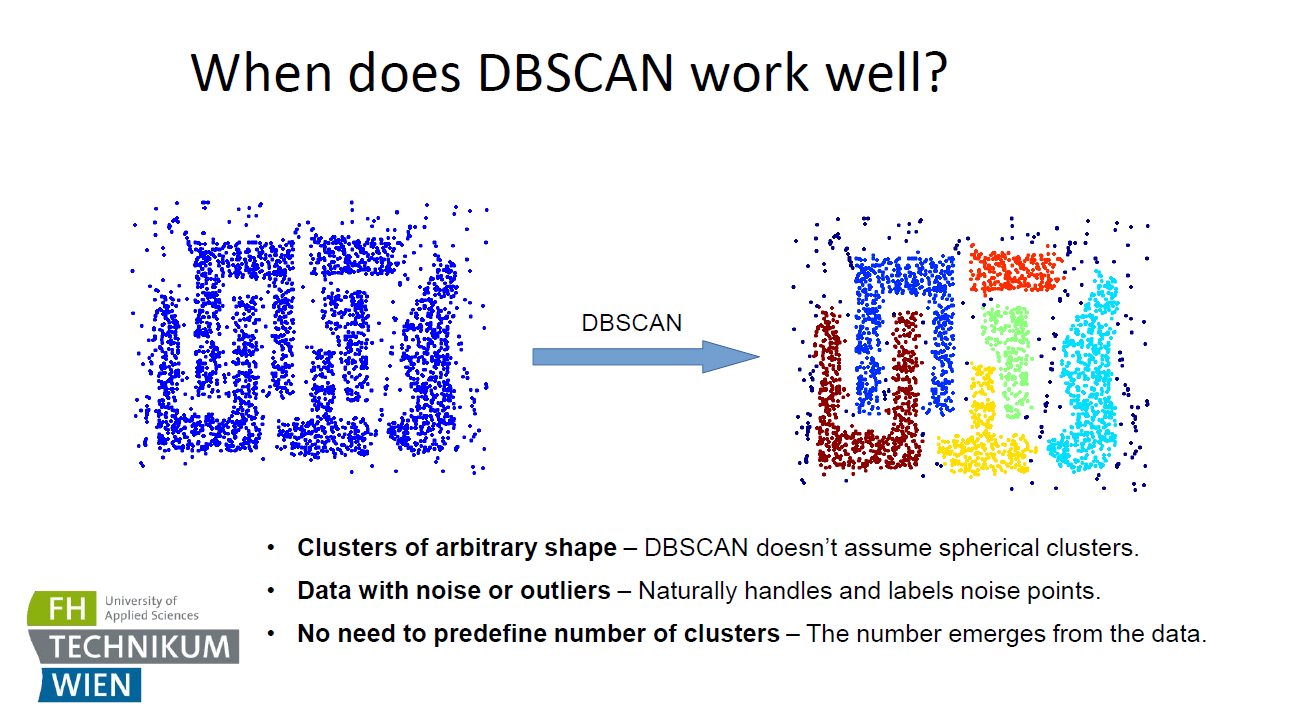

Perfect — this is the ideal **closing slide** to emphasize when DBSCAN truly shines.

---

## ✅ **When does DBSCAN work well?**

This transformation—from unclustered to well-separated groups—highlights DBSCAN’s **strengths in real-world data scenarios**.

---

### 💡 **DBSCAN excels when...**

### 1. **Clusters have arbitrary shapes**

* Unlike k-means, which assumes spherical or convex shapes,
  ➤ DBSCAN handles **non-linear, irregular, even nested structures**.
* Example: shapes like spirals, borders, or L-shaped distributions.

---

### 2. **Data contains noise or outliers**

* DBSCAN **naturally labels outliers as noise points**.
* There’s **no need to pre-clean the data** manually — outliers won’t distort the clusters.

---

### 3. **You don’t know the number of clusters in advance**

* DBSCAN **does not require `k` upfront** like k-means or GMM.
* The number of clusters **emerges from the data** based on density.

---

### 🧠 Final takeaway:

> DBSCAN is **intuitive, flexible, and powerful**, especially for messy, irregular, or unknown datasets — just choose your parameters wisely.

Would you like a final recap handout (e.g., PDF or Markdown), quiz export, or speaking notes to accompany this presentation?


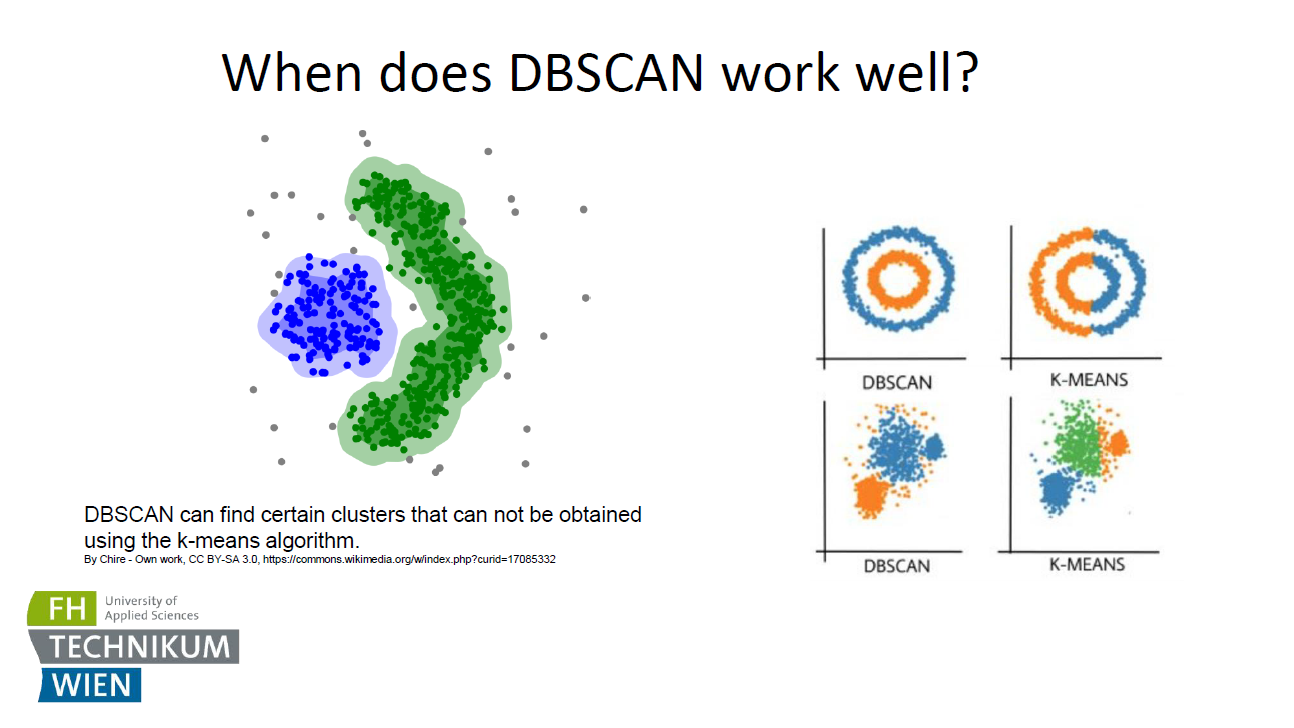

This is a **powerful visual comparison** to end the session with.

---

## 🟢 **When does DBSCAN work well?** (vs. K-Means)

This slide illustrates how DBSCAN succeeds **where K-Means fails**:

---

### 💥 **Key differences:**

| Aspect                        | **DBSCAN**                                  | **K-Means**                                |
| ----------------------------- | ------------------------------------------- | ------------------------------------------ |
| **Cluster Shape**             | ✅ Can handle **arbitrary shapes**           | ❌ Assumes **spherical** or convex clusters |
| **Noise Handling**            | ✅ Explicitly detects **outliers**           | ❌ Outliers distort the mean                |
| **Predefining Cluster Count** | ❌ Not required                              | ✅ Required (fixed `k`)                     |
| **Separation Assumption**     | ✅ Uses **density**, no centroid-based split | ❌ Hard boundaries defined by centroid      |

---

### 🧪 **Visual insight (left and right panels):**

* ✅ **DBSCAN** correctly detects:

  * **Nested rings** (top left)
  * **Clusters with noise** (bottom left)
  * **Non-convex blobs** (left main image)

* ❌ **K-Means**:

  * Fails with **non-spherical shapes**
  * Produces **erroneous splits** when shapes aren’t ideal
  * **Forces** data into clusters even when not appropriate

---

### ✅ **So when should you use DBSCAN?**

* When your data contains:

  * **Non-convex clusters**
  * **Irregular densities**
  * **Outliers**
  * **Unknown number of clusters**

---

This concludes the full walkthrough of DBSCAN — from concept to tuning and performance!

Would you like me to:

* Export a **PDF script** of your full presentation?
* Generate **speaker notes** or **a recap slide**?
* Create a printable **DBSCAN cheat sheet**?


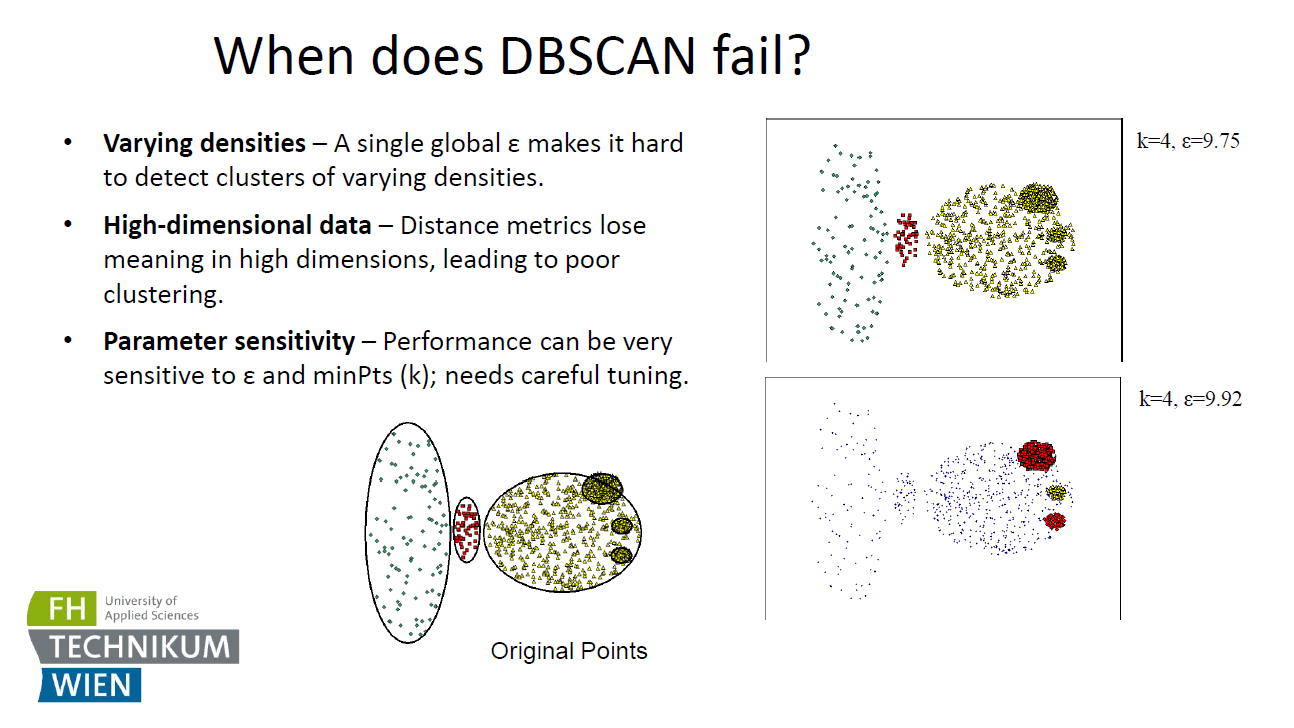

Excellent — this slide provides a critical **counterbalance** by highlighting **when DBSCAN struggles**. It’s the perfect counterpart to the previous “when it works well” slide.

---

## ⚠️ **When does DBSCAN fail?**

Despite its advantages, DBSCAN is **not a silver bullet**. Its performance depends heavily on the data and parameter tuning.

---

### ❌ **1. Varying Densities**

* **Single global 𝜀** cannot adapt to clusters with different densities.
* A value of 𝜀 that works well for one group may **overmerge or underdetect** others.
* Example:

  * In the plot on the right:

    * **𝜀 = 9.75** → works for the dense group but over-clusters the rest.
    * **𝜀 = 9.92** → loses some clusters entirely.

---

### ❌ **2. High-Dimensional Data**

* In high dimensions:

  * **Distance measures lose discriminative power**.
  * All points tend to appear equally far apart (“curse of dimensionality”).
* Result: **no clear clusters**, or large meaningless blobs.

---

### ❌ **3. Parameter Sensitivity**

* DBSCAN is **very sensitive** to:

  * 𝜀 (neighborhood size)
  * **minPts (k)** (minimum neighbors for a core point)
* Tiny changes can dramatically **alter clustering results**, especially in noisy data.

---

### 🧠 Tip:

> Use **domain knowledge** + **elbow method** + **visual validation**
> to fine-tune parameters and assess reliability.

---

This wraps up a **balanced view of DBSCAN** — strengths, weaknesses, applications, and limitations.

Let me know if you'd like:

* A recap PDF
* Speaking notes for each slide
* A printable cheat sheet
* Or a final Q\&A quiz for your audience


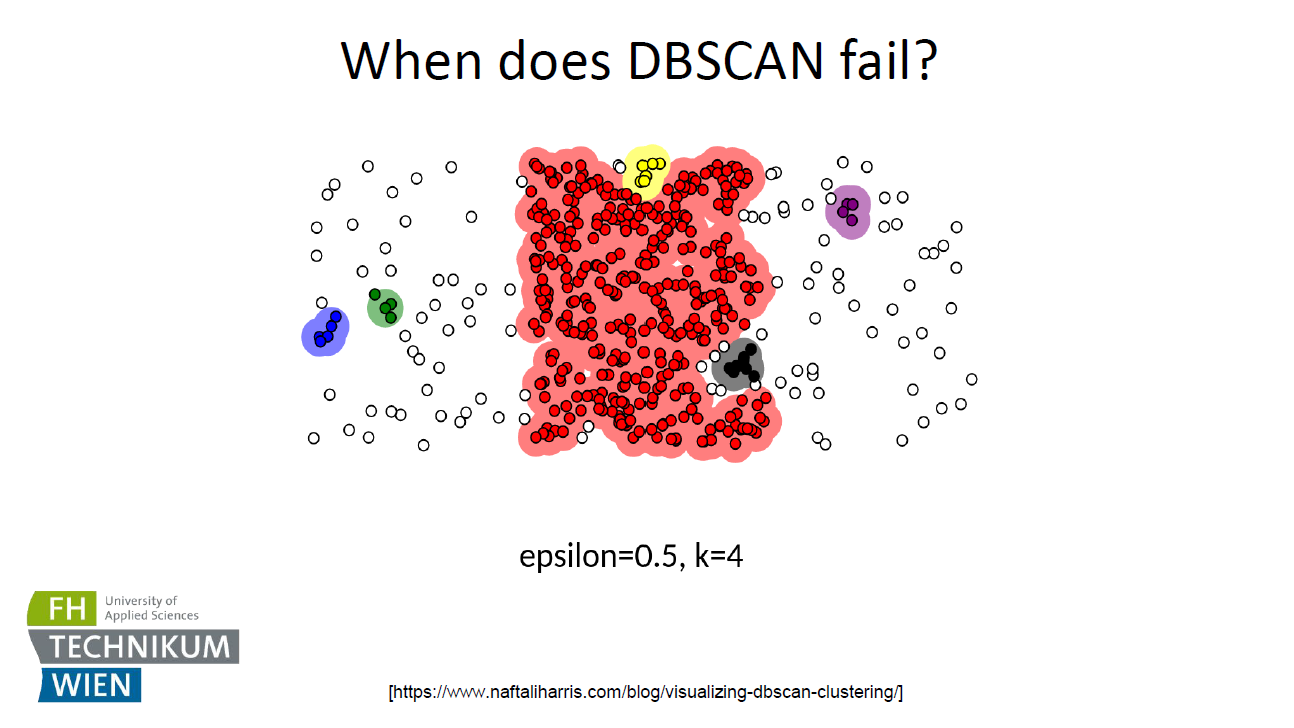

This final image provides a **visually striking example** of one of DBSCAN's most common failure cases.

---

## ❌ **When does DBSCAN fail? — Example**

**Parameters:**

* `epsilon = 0.5`
* `k = 4` (minPts)

---

### 🔍 **What’s going wrong here?**

* The large **dense central region** is correctly captured (red cluster).
* But many **small, well-defined clusters** are:

  * **Missed** or
  * **Merged into the red blob** or
  * Labeled as **noise** (white circles).
* These peripheral clusters **don’t meet minPts within epsilon**, so they’re **ignored** despite being visually valid.

---

### 💣 Failure Reasons Illustrated

| Failure Mode              | Manifestation in the Image                                          |
| ------------------------- | ------------------------------------------------------------------- |
| **Varying Density**       | Small tight clusters are lost due to a global 𝜀 too large for them |
| **Parameter Sensitivity** | The wrong 𝜀 swallows everything into one dominant cluster          |
| **Under-detection**       | Real structures (like green, blue, purple groups) aren't identified |

---

### 🧠 **Lesson:**

* DBSCAN **isn't suitable** for datasets with:

  * Wide range of cluster densities
  * Small compact groups surrounded by sparser noise
* Parameter tuning alone **may not fix** this — try **HDBSCAN** or **OPTICS** instead

---

Would you like a final slide summarizing **pros, cons, and alternatives** to DBSCAN for your talk?


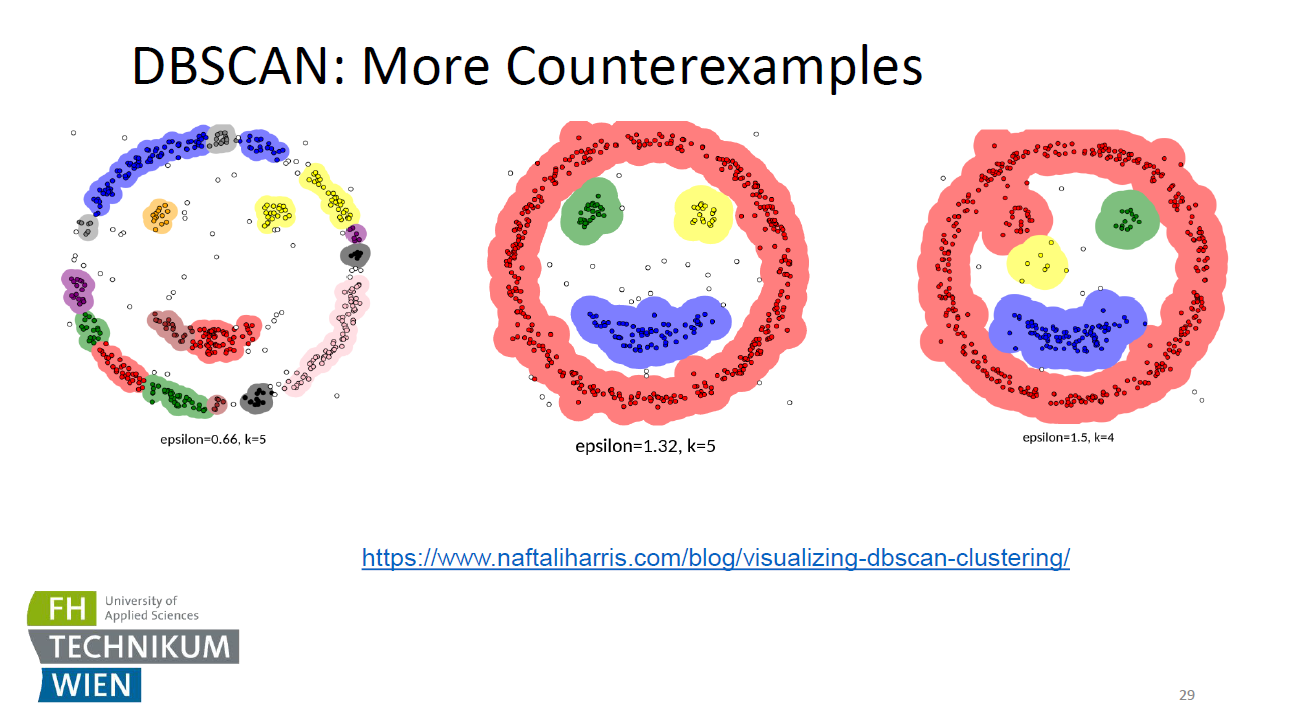

This slide is a **perfect wrap-up on DBSCAN limitations**, using **clear visual counterexamples**:

---

## ❌ **DBSCAN: More Counterexamples**

### 📌 Common Setup Issues Displayed

Each figure shows **different ε (epsilon) and k (minPts)** values:

| Image  | Parameters      | Outcome                                                  |
| ------ | --------------- | -------------------------------------------------------- |
| Left   | ε = 0.66, k = 5 | **Too many small clusters** – fragmentation              |
| Center | ε = 1.32, k = 5 | **Smoothed over structure** – outer ring merged too much |
| Right  | ε = 1.5, k = 4  | **Mixed result** – some regions merged, others distinct  |

---

### 🔍 **Key Failures Illustrated**

1. **Over-clustering** (too small ε)
   → breaks true structure into **tiny pieces**
2. **Under-clustering** (too large ε)
   → merges distinct regions into one giant **blob**
3. **Parameter sensitivity**
   → small ε/k changes yield **wildly different** outputs
4. **Inconsistent results** on even **simple geometries**

---

### 🧠 **Lesson Recap**

* DBSCAN **works well** with:

  * uniform density
  * well-separated groups

* It **fails** when:

  * densities vary
  * geometry is complex
  * poor ε/k choices are made

---

Would you like me to now create a **final summary slide** with:

* Pros and cons of DBSCAN
* When to use alternatives like **HDBSCAN**, **OPTICS**, or **KMeans**?


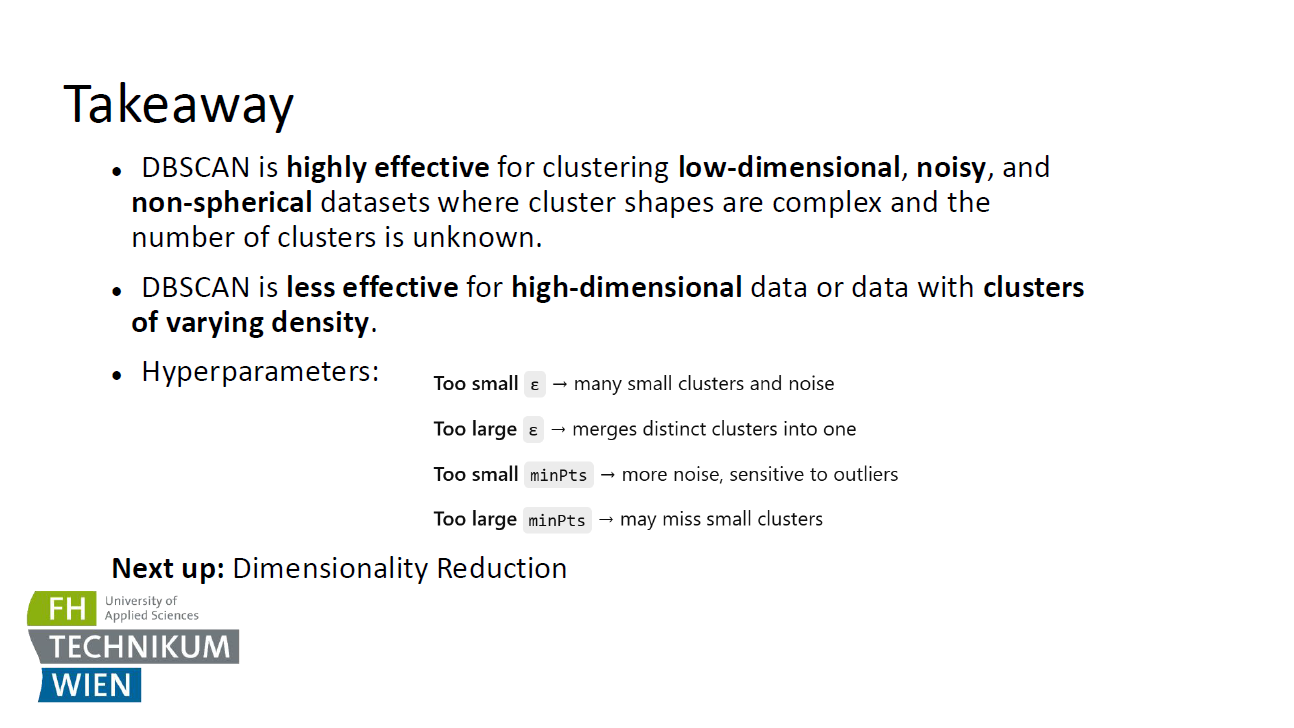

Perfect — this slide provides a **concise and well-rounded takeaway** summarizing when and why DBSCAN performs well or poorly. Here's a recap in clean bullet format for presentation or notes:

---

## ✅ DBSCAN: When It Shines

* **Ideal for**:

  * Low-dimensional data
  * Noisy datasets
  * Arbitrary (non-spherical) shaped clusters
  * Unknown number of clusters

* **Strengths**:

  * Automatically identifies the number of clusters
  * Explicitly detects **noise** (outliers)
  * Works well on **irregular geometries**

---

## ⚠️ DBSCAN: When It Struggles

* **High-dimensional data**
  → Distance metrics become unreliable

* **Clusters with varying density**
  → A single global ε can't fit all areas

* **Parameter sensitivity**
  → Needs careful tuning of:

  * **ε** (neighborhood radius)
  * **minPts** (minimum neighbors to be a core point)

---

## 🔧 Hyperparameter Pitfalls

| Setting          | Effect                                             |
| ---------------- | -------------------------------------------------- |
| ε too small      | Too many tiny clusters or everything becomes noise |
| ε too large      | Merges distinct clusters                           |
| minPts too small | Sensitive to noise and outliers                    |
| minPts too large | Misses small meaningful clusters                   |

---

If you’d like, I can now provide:

* A **1-page printable summary sheet** (PDF or Markdown)
* Or **multiple-choice questions** (MCQ) for quiz/review
* Or help with the **next topic: Dimensionality Reduction**

Let me know how you'd like to continue.


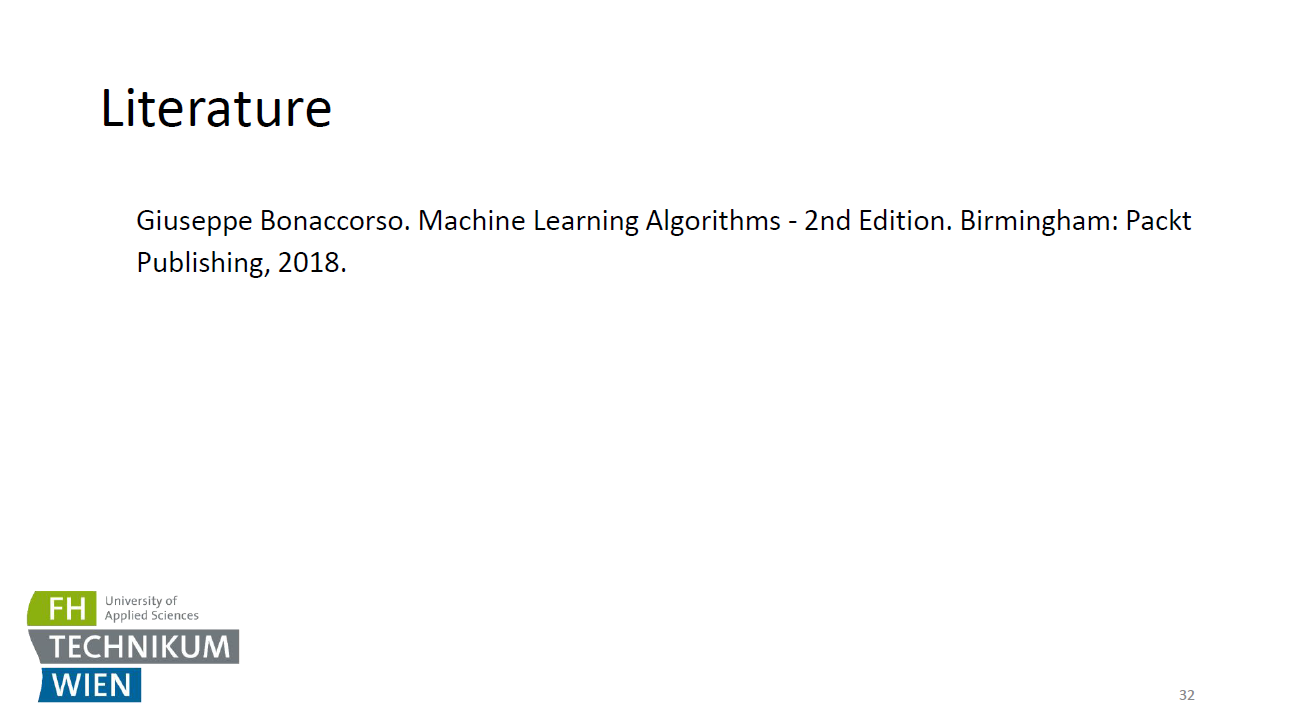